# 0.0 IMPORTS

In [492]:
import pandas    as pd
import numpy     as np
import seaborn   as sns
import warnings
import re


from IPython.core.display  import HTML
from matplotlib            import pyplot as plt

warnings.filterwarnings('ignore')

# 0.1 Helper Functions

In [414]:
def jupyter_settings():
        %matplotlib inline
        
        plt.style.use('bmh')
        plt.rcParams['figure.figsize'] = [25 , 12]
        plt.rcParams['font.size'] = 24
        
        display( HTML( '<style>.container { width:100% !important; }</style>') )
        pd.options.display.max_columns = None
        pd.options.display.max_rows = None
        pd.set_option( 'display.expand_frame_repr', False )
        
        sns.set()

In [415]:
jupyter_settings()

# 0.2 Loading Dataset

In [416]:
data = pd.read_csv('sinasc_2016.csv')

In [3]:
data.head()

,DTNASC,CODMUNNASC,CODMUNRES,DTNASCMAE,CODESTAB,RACACORMAE,LOCNASC,PARTO,PESO,ESCMAE2010,ESTCIVMAE,GESTACAO,SEMAGESTAC,SERIESCMAE,IDADEPAI,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,CONSPRENAT
0,19022016,110001,110001,18121987.0,2679477.0,1.0,1,1.0,3100,2.0,2.0,5.0,39.0,8.0,24.0,2.0,2.0,3.0,1.0,9.0
1,22022016,110001,110001,17011998.0,NaN,5.0,4,1.0,1800,1.0,5.0,5.0,37.0,3.0,20.0,1.0,2.0,3.0,1.0,5.0
2,13022016,110001,110001,15021986.0,2679477.0,5.0,1,1.0,3545,1.0,5.0,5.0,39.0,NaN,38.0,1.0,2.0,3.0,1.0,7.0
3,5022016,110001,110001,7041986.0,2679477.0,5.0,1,1.0,3550,1.0,9.0,5.0,39.0,3.0,NaN,1.0,2.0,3.0,1.0,6.0
4,25022016,110001,110001,18121989.0,2679477.0,1.0,1,1.0,2obeso565,3.0,5.0,5.0,38.0,NaN,34.0,1.0,2.0,3.0,1.0,7.0


# 1.0 Data Description

In [535]:
df1 = data.copy()

## 1.1 Data Columns Lowercase

In [536]:
df1.columns = df1.columns.str.lower()

In [537]:
df1.columns

Index(['dtnasc', 'codmunnasc', 'codmunres', 'dtnascmae', 'codestab',
       'racacormae', 'locnasc', 'parto', 'peso', 'escmae2010', 'estcivmae',
       'gestacao', 'semagestac', 'seriescmae', 'idadepai', 'tpapresent',
       'sttrabpart', 'stcesparto', 'tpnascassi', 'consprenat'],
      dtype='object')

## 1.2 Data Dimension

In [538]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 2857800
Number of Columns: 20


## 1.3 Data Types

In [539]:
df1.dtypes

dtnasc          int64
codmunnasc      int64
codmunres       int64
dtnascmae     float64
codestab      float64
racacormae    float64
locnasc         int64
parto         float64
peso           object
escmae2010    float64
estcivmae     float64
gestacao      float64
semagestac    float64
seriescmae    float64
idadepai      float64
tpapresent    float64
sttrabpart    float64
stcesparto    float64
tpnascassi    float64
consprenat    float64
dtype: object

## 1.4 Check NA

In [540]:
df1.isna().sum()

dtnasc              0
codmunnasc          0
codmunres           0
dtnascmae       25426
codestab        26433
racacormae     134985
locnasc             0
parto            2344
peso                0
escmae2010      38287
estcivmae       21331
gestacao        55768
semagestac      56968
seriescmae    1113667
idadepai      1658950
tpapresent      29880
sttrabpart      59664
stcesparto      50641
tpnascassi      20259
consprenat      58187
dtype: int64

## 1.5 Data Descriptive

In [541]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [542]:
#Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
                  
#concat
m1 = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m1.columns = ['attributes,', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m1

,"attributes,",min,max,range,mean,median,std,skew,kurtosis
0,dtnasc,1012016.0,31122016.0,30110000.0,1.574314e+07,16022016.0,8.771673e+06,0.011023,-1.188331
1,codmunnasc,110001.0,530010.0,420009.0,3.198010e+05,330100.0,9.863578e+04,0.046294,-0.189838
2,codmunres,110000.0,530010.0,420010.0,3.197213e+05,330070.0,9.857628e+04,0.042178,-0.195972
3,dtnascmae,1011963.0,31122003.0,30110040.0,1.567807e+07,NaN,8.783088e+06,0.021841,-1.192598
4,codestab,0.0,9999999.0,9999999.0,2.737186e+06,NaN,1.523812e+06,1.393317,2.800512
5,racacormae,1.0,5.0,4.0,2.793803e+00,NaN,1.442509e+00,-0.354459,-1.793985
6,locnasc,1.0,9.0,8.0,1.029254e+00,1.0,2.505947e-01,10.544023,138.513467
7,parto,1.0,9.0,8.0,1.554619e+00,NaN,4.988197e-01,-0.110759,-0.367521
8,escmae2010,0.0,9.0,9.0,2.997734e+00,NaN,1.134623e+00,1.023852,3.195956
9,estcivmae,1.0,9.0,8.0,2.307748e+00,NaN,1.617562e+00,1.100688,0.038170


# 2.0 Answering the questions

In [543]:
df2 = df1.copy()

# 2.1 Question 1

Considering that the first two digits of the municipality code represent its Federative Unit (UF):

a) Create two variables, one with the code and the other with the name of the UF of birth and show the distribution.

b) What is the name of the five most frequent UFs, where the municipality of residence is the same as the one at birth?

c) How many municipalities appear in each UF of birth?


### 2.1.1 A) Create two variables, one with the code and the other with the name of the UF of birth and show the distribution.

In [544]:
df2['codestadnasc'] = df2['codmunnasc'].astype(str).str[:2].astype(int)

In [545]:
df2['codestadnasc'].unique()

array([11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 29, 27, 28, 31,
       33, 32, 35, 50, 41, 42, 43, 51, 52, 53])

In [546]:
df2['estadonasc'] = df2['codestadnasc'].map({ 11: 'Acre', 12: 'Amapá', 13: 'Amazona', 14: 'Pará', 15: 'Rondonia',
                                              16: 'Roraima', 17: 'Tocantins', 21: 'Alagoas', 22: 'Bahia', 23: 'Ceará',
                                              24: 'Maranhão', 25: 'Paraíba', 26: 'Pernambuco', 29:'Rio Grande do Norte',
                                              27: 'Piauí', 28: 'Sergipe', 31: 'Espírito Santo', 33: 'Minas Gerais', 
                                              32: 'Rio de Janeiro', 35: 'São Paulo', 41: 'Mato Grosso', 
                                              42: 'Mato Grosso do Sul', 43: 'Goiás', 50: 'Distrito Federal', 51: 'Paraná',
                                              52: 'Santa Catarina', 53: 'Rio Grande do Sul'})

In [547]:
number_nasc_state = df2.groupby('estadonasc').size().sort_values(ascending = False)

In [548]:
number_nasc_state

estadonasc
São Paulo              602970
Espírito Santo         252961
Minas Gerais           219174
Rio Grande do Norte    198214
Mato Grosso            154636
Goiás                  141446
Rondonia               135701
Pernambuco             131773
Ceará                  126377
Alagoas                108537
Mato Grosso do Sul      95466
Santa Catarina          83605
Amazona                 76208
Rio Grande do Sul       55900
Paraíba                 55724
Paraná                  53346
Rio de Janeiro          52991
Bahia                   49693
Piauí                   47380
Maranhão                45909
Distrito Federal        42009
Sergipe                 33159
Acre                    26706
Tocantins               23370
Roraima                 16850
Amapá                   16333
Pará                    11362
dtype: int64

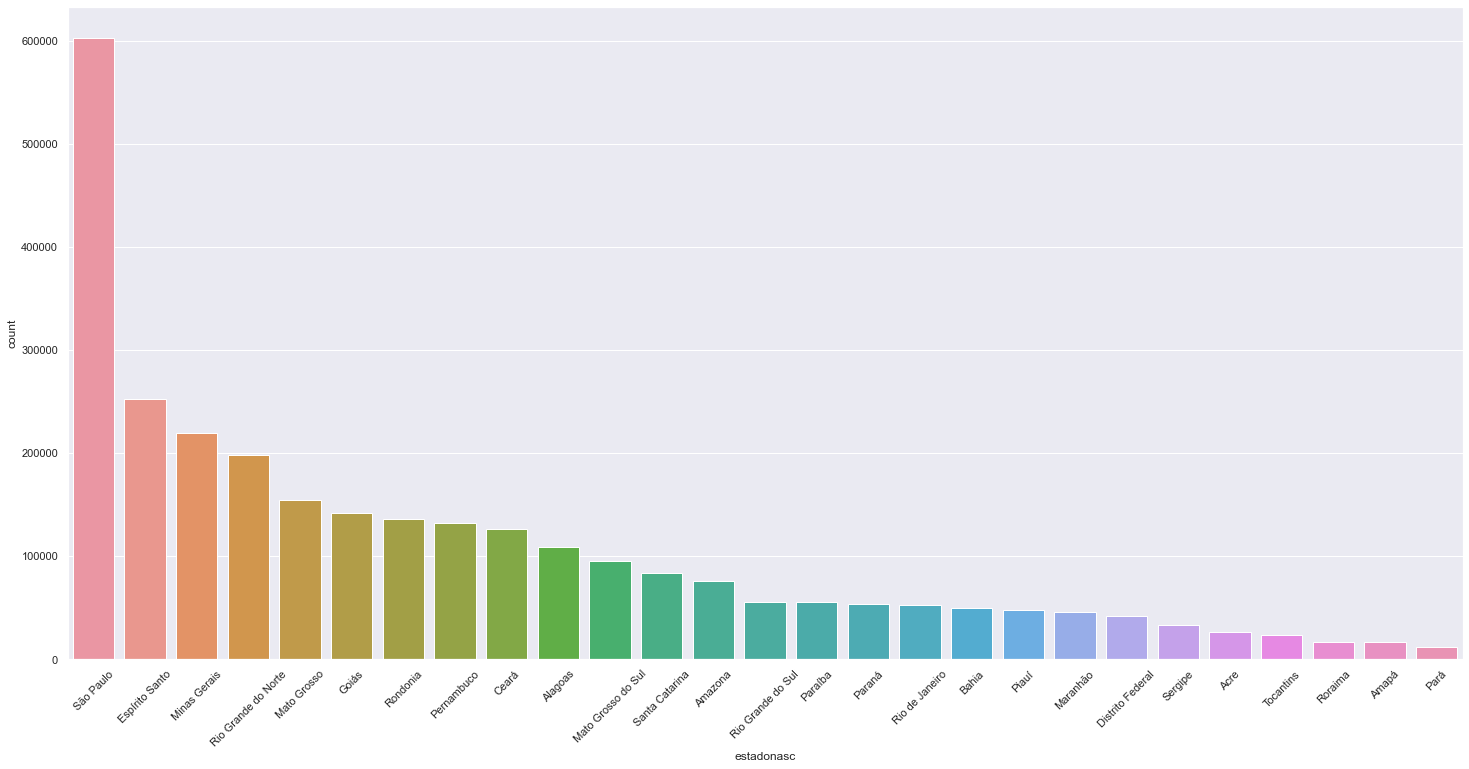

In [549]:
sns.countplot(x='estadonasc', data=df2, order = df2['estadonasc'].value_counts().index)
plt.xticks(rotation=45);

### 2.1.2 B) What is the name of the five most frequent UFs, where the municipality of residence is the same as the one at birth?

In [550]:
aux = df2[['codmunnasc', 'codmunres']]

In [551]:
aux['new'] = aux.apply(lambda x: 'yes' if x['codmunnasc'] == x['codmunres'] else np.nan, axis=1)

In [552]:
aux.head()

,codmunnasc,codmunres,new
0,110001,110001,yes
1,110001,110001,yes
2,110001,110001,yes
3,110001,110001,yes
4,110001,110001,yes


In [553]:
aux['codestadnasc'] = aux['codmunnasc'].astype(str).str[:2].astype(int)

In [554]:
aux['estadonasc'] = aux['codestadnasc'].map({ 11: 'Acre', 12: 'Amapá', 13: 'Amazona', 14: 'Pará', 15: 'Rondonia',
                                              16: 'Roraima', 17: 'Tocantins', 21: 'Alagoas', 22: 'Bahia', 23: 'Ceará',
                                              24: 'Maranhão', 25: 'Paraíba', 26: 'Pernambuco', 29:'Rio Grande do Norte',
                                              27: 'Piauí', 28: 'Sergipe', 31: 'Espírito Santo', 33: 'Minas Gerais', 
                                              32: 'Rio de Janeiro', 35: 'São Paulo', 41: 'Mato Grosso', 
                                              42: 'Mato Grosso do Sul', 43: 'Goiás', 50: 'Distrito Federal', 51: 'Paraná',
                                              52: 'Santa Catarina', 53: 'Rio Grande do Sul'})

In [555]:
aux1 = aux[aux['new'] == 'yes']

In [556]:
tot = aux1.groupby('estadonasc').size().sort_values(ascending=False)
tot

estadonasc
São Paulo              454466
Espírito Santo         161827
Minas Gerais           161794
Rio Grande do Norte    137568
Rondonia               105443
Mato Grosso            104040
Goiás                   99887
Ceará                   83181
Alagoas                 76898
Amazona                 71174
Pernambuco              61838
Santa Catarina          58935
Mato Grosso do Sul      58876
Rio Grande do Sul       42740
Paraná                  38737
Distrito Federal        36290
Rio de Janeiro          30793
Paraíba                 28234
Bahia                   27024
Piauí                   26857
Maranhão                24437
Acre                    18951
Sergipe                 13682
Roraima                 13164
Tocantins               12654
Amapá                   11950
Pará                     8668
dtype: int64

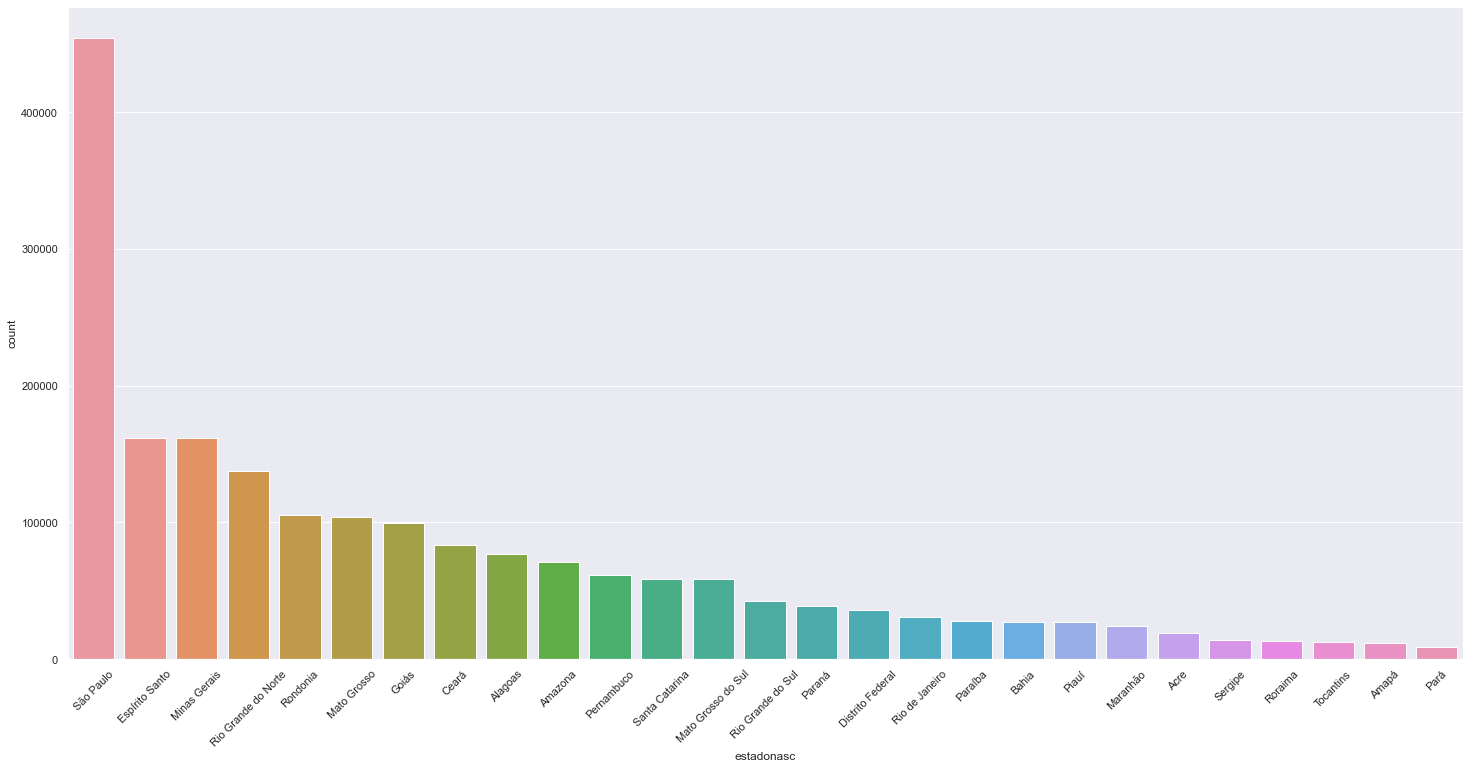

In [557]:
sns.countplot(x='estadonasc', data=aux1, order = aux1['estadonasc'].value_counts().index)
plt.xticks(rotation=45);

### 2.1.3 C) How many municipalities appear in each UF of birth?

In [558]:
aux = df2.groupby('estadonasc')['codmunnasc'].nunique().sort_values(ascending= False)

In [559]:
aux = df2['codestadnasc'] = df2['codmunnasc'].astype(str).str[:2].astype(int)

## 2.2 Question 2

In [560]:
df3 = df2.copy()

2. Create an integer variable with the age of the mother using the date 12/07/2021 as a reference.

a) What are the three lowest ages and three highest ages of mothers?

b) What is the frequency distribution of the age of mothers in Bahia?

c) If there is any inconsistent age, take the necessary treatment and show.

In [561]:
df3.head()

,dtnasc,codmunnasc,codmunres,dtnascmae,codestab,racacormae,locnasc,parto,peso,escmae2010,estcivmae,gestacao,semagestac,seriescmae,idadepai,tpapresent,sttrabpart,stcesparto,tpnascassi,consprenat,codestadnasc,estadonasc
0,19022016,110001,110001,18121987.0,2679477.0,1.0,1,1.0,3100,2.0,2.0,5.0,39.0,8.0,24.0,2.0,2.0,3.0,1.0,9.0,11,Acre
1,22022016,110001,110001,17011998.0,NaN,5.0,4,1.0,1800,1.0,5.0,5.0,37.0,3.0,20.0,1.0,2.0,3.0,1.0,5.0,11,Acre
2,13022016,110001,110001,15021986.0,2679477.0,5.0,1,1.0,3545,1.0,5.0,5.0,39.0,NaN,38.0,1.0,2.0,3.0,1.0,7.0,11,Acre
3,5022016,110001,110001,7041986.0,2679477.0,5.0,1,1.0,3550,1.0,9.0,5.0,39.0,3.0,NaN,1.0,2.0,3.0,1.0,6.0,11,Acre
4,25022016,110001,110001,18121989.0,2679477.0,1.0,1,1.0,2obeso565,3.0,5.0,5.0,38.0,NaN,34.0,1.0,2.0,3.0,1.0,7.0,11,Acre


### 2.2.1 A) What are the three lowest ages and three highest ages of mothers?

### Dropna

In [562]:
df3 = df3[pd.notnull(df3['dtnascmae'])]

In [563]:
df3['dtnascmae'] = df3['dtnascmae'].astype('int64')

In [564]:
df3['anomaenasc'] = df3['dtnascmae'].astype(str).str[-4:].astype('int64')

In [565]:
df3['anomaenasc'].unique()

array([1987, 1998, 1986, 1989, 1996, 1993, 1999, 1991, 1995, 1994, 1985,
       1983, 2001, 1980, 1990, 1977, 1982, 1988, 1997, 1984, 1981, 1976,
       1974, 1979, 1992, 2000, 2002, 1978, 1975, 1973, 1971, 2003, 1970,
       1972, 1969, 1967, 2004, 1968, 1965, 1964, 1966, 1951, 1962, 1961,
       1963, 1960,  992,  998, 1958, 2006,  985,  984,  988, 1953,  981,
       2005,  986, 1955, 1956, 1957,  982,  990,  976, 1959,  993,  980,
        199, 1952, 1954, 2016,   90,  991,  996,  979,  994, 1944,  997,
        995,  987,  999, 2007, 2008,  989], dtype=int64)

In [566]:
df3['anomaenasc'] = df3['anomaenasc'].replace([992,  998, 982,  990,  976, 985,  984,  988, 981, 986, 993,  980,  999, 90,  991,  996,  979,  994, 997,  995,  987, 199, 989], 
                                              [1992, 1998, 1982, 1990, 1976, 1985, 1984, 1998, 1981, 1986, 1993,  1980,  1999, 1990,  1991,  1996,  1979,  1994, 1997,  1995,  1987, 1999, 1989])

In [567]:
df3['mesmaenasc'] = df3['dtnascmae'].astype(str).str[2:-4].astype(int)

In [568]:
df3['mesmaenasc'] = df3['mesmaenasc'].replace([0], [10])

In [569]:
df3['diamaenasc'] = df3['dtnascmae'].astype(str).str[:-6].astype(int)

In [570]:
cols=['diamaenasc','mesmaenasc','anomaenasc']
df3['date'] = df3[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis=1)

In [571]:
df3['date']=pd.to_datetime(df3['date'])

In [572]:
day_calc_age = '2021-07-12'

In [573]:
df3['day_calc_age'] = day_calc_age

In [574]:
df3['day_calc_age'] = pd.to_datetime(df3['day_calc_age'], format='%Y-%m-%d')

In [575]:
df3['idademae'] = (df3['day_calc_age'] - df3['date'])

In [576]:
df3['idademae'] = abs(df3['idademae'] / np.timedelta64(1, 'Y'))
df3['idademae'] = df3['idademae'].astype('int64')

In [577]:
df3.sort_values('idademae', ascending=False).head(20)

,dtnasc,codmunnasc,codmunres,dtnascmae,codestab,racacormae,locnasc,parto,peso,escmae2010,estcivmae,gestacao,semagestac,seriescmae,idadepai,tpapresent,sttrabpart,stcesparto,tpnascassi,consprenat,codestadnasc,estadonasc,anomaenasc,mesmaenasc,diamaenasc,date,day_calc_age,idademae
1386430,11062016,355030,355030,26041944,2065665.0,1.0,1,1.0,3400,2.0,5.0,5.0,40.0,8.0,NaN,1.0,1.0,3.0,1.0,7.0,35,São Paulo,1944,4,26,1944-04-26,2021-07-12,77
565818,7022016,330510,330510,27051951,6518893.0,1.0,1,1.0,4050,3.0,1.0,5.0,40.0,NaN,NaN,1.0,2.0,3.0,1.0,3.0,33,Minas Gerais,1951,5,27,1951-05-27,2021-07-12,70
19552,17032016,130195,130195,1031951,NaN,5.0,3,1.0,3000gr,0.0,5.0,6.0,42.0,NaN,72.0,1.0,9.0,3.0,3.0,9.0,13,Amazona,1951,3,1,1951-01-03,2021-07-12,70
590198,15042016,350900,351630,22101951,7580770.0,4.0,1,1.0,3085,3.0,2.0,4.0,36.0,NaN,NaN,1.0,1.0,3.0,1.0,9.0,35,São Paulo,1951,10,22,1951-10-22,2021-07-12,69
767026,26022016,355030,354870,24071952,2079542.0,1.0,1,2.0,3310,5.0,2.0,5.0,38.0,NaN,42.0,2.0,2.0,1.0,1.0,8.0,35,São Paulo,1952,7,24,1952-07-24,2021-07-12,68
179232,8042016,230440,230440,6021953,2482339.0,4.0,1,1.0,3090,3.0,1.0,6.0,43.0,2.0,NaN,1.0,2.0,3.0,1.0,10.0,23,Ceará,1953,2,6,1953-06-02,2021-07-12,68
1432928,1062016,412240,411190,20041953,4055748.0,4.0,1,1.0,2obeso950,3.0,5.0,5.0,40.0,2.0,23.0,1.0,1.0,3.0,1.0,5.0,41,Mato Grosso,1953,4,20,1953-04-20,2021-07-12,68
2443974,26102016,330490,330490,12111952,2292157.0,1.0,1,2.0,2obeso390,3.0,5.0,5.0,39.0,3.0,NaN,1.0,2.0,1.0,1.0,9.0,33,Minas Gerais,1952,11,12,1952-12-11,2021-07-12,68
2037477,5112016,150050,150050,22031954,2331748.0,4.0,1,1.0,2obeso970,2.0,5.0,6.0,42.0,8.0,NaN,1.0,2.0,3.0,4.0,7.0,15,Rondonia,1954,3,22,1954-03-22,2021-07-12,67
2817975,19092016,520510,520510,14031954,3940829.0,4.0,1,2.0,2obeso700,3.0,4.0,4.0,36.0,3.0,42.0,1.0,1.0,2.0,1.0,8.0,52,Santa Catarina,1954,3,14,1954-03-14,2021-07-12,67


In [578]:
df3.sort_values('idademae', ascending=True).head(20)

,dtnasc,codmunnasc,codmunres,dtnascmae,codestab,racacormae,locnasc,parto,peso,escmae2010,estcivmae,gestacao,semagestac,seriescmae,idadepai,tpapresent,sttrabpart,stcesparto,tpnascassi,consprenat,codestadnasc,estadonasc,anomaenasc,mesmaenasc,diamaenasc,date,day_calc_age,idademae
952486,3042016,510340,510340,21072016,2604388.0,4.0,1,1.0,3515,5.0,2.0,5.0,41.0,NaN,NaN,1.0,2.0,3.0,1.0,9.0,51,Paraná,2016,7,21,2016-07-21,2021-07-12,4
2380327,6102016,314330,313505,22102016,2149990.0,4.0,1,NaN,2obeso675,3.0,2.0,5.0,41.0,3.0,NaN,9.0,NaN,NaN,1.0,8.0,31,Espírito Santo,2016,10,22,2016-10-22,2021-07-12,4
926018,6032016,432260,432260,29032016,2236370.0,1.0,1,1.0,3315,4.0,5.0,5.0,39.0,NaN,35.0,1.0,1.0,3.0,1.0,11.0,43,Goiás,2016,3,29,2016-03-29,2021-07-12,5
857815,31032016,420550,420550,31032016,7274351.0,1.0,1,2.0,2obeso710,3.0,1.0,5.0,38.0,1.0,24.0,1.0,2.0,1.0,1.0,13.0,42,Mato Grosso do Sul,2016,3,31,2016-03-31,2021-07-12,5
1918960,25072016,420460,420700,3052016,5712068.0,1.0,1,2.0,3065,5.0,2.0,5.0,38.0,NaN,NaN,1.0,2.0,1.0,1.0,7.0,42,Mato Grosso do Sul,2016,5,3,2016-03-05,2021-07-12,5
1278359,4062016,330470,330470,5062016,2275244.0,4.0,1,2.0,3895,5.0,2.0,5.0,39.0,NaN,43.0,1.0,2.0,2.0,1.0,7.0,33,Minas Gerais,2016,6,5,2016-05-06,2021-07-12,5
873067,31032016,421660,421190,4042016,2555646.0,1.0,1,2.0,3825,2.0,1.0,5.0,39.0,8.0,23.0,1.0,2.0,2.0,1.0,10.0,42,Mato Grosso do Sul,2016,4,4,2016-04-04,2021-07-12,5
873189,24042016,421660,421660,27042016,2555646.0,NaN,1,2.0,3290,3.0,1.0,5.0,38.0,3.0,25.0,1.0,2.0,1.0,1.0,9.0,42,Mato Grosso do Sul,2016,4,27,2016-04-27,2021-07-12,5
1063531,12062016,210120,210590,13062016,6922902.0,4.0,1,1.0,3625,2.0,5.0,5.0,39.0,NaN,NaN,1.0,2.0,3.0,1.0,5.0,21,Alagoas,2016,6,13,2016-06-13,2021-07-12,5
2163500,26112016,230440,230440,2062008,2529068.0,4.0,1,1.0,3330,2.0,1.0,5.0,40.0,5.0,NaN,1.0,2.0,3.0,1.0,8.0,23,Ceará,2008,6,2,2008-02-06,2021-07-12,13


### 2.2.2 B) What is the frequency distribution of the age of mothers in Bahia?

In [579]:
aux2 = df3[df3['estadonasc'] == 'Bahia']

In [580]:
aux = aux2.groupby('idademae')

<AxesSubplot: xlabel='idademae', ylabel='count'>

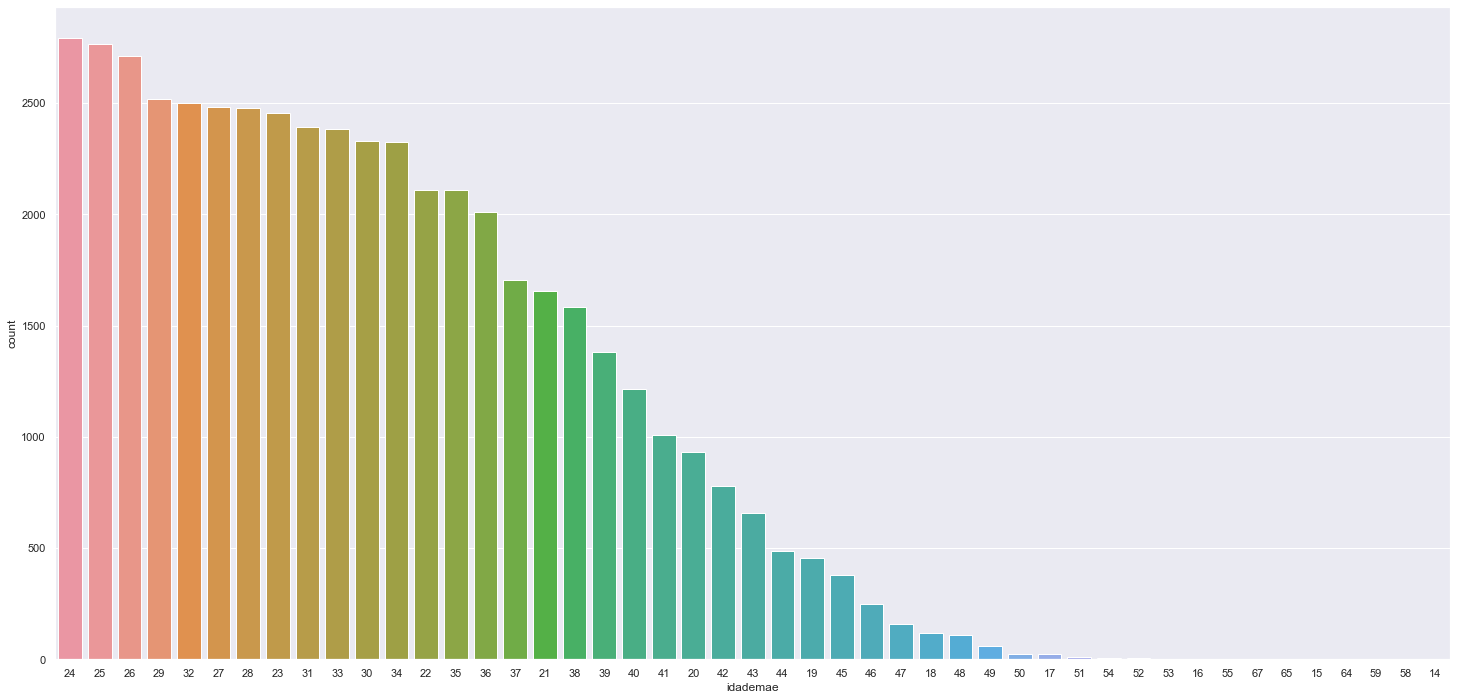

In [581]:
sns.countplot(x='idademae', data=aux2, order = aux2['idademae'].value_counts().index)

### 2.2.3 C) What is the percentage of this value considering the size of the database?


In [582]:
aux = aux2.groupby('idademae').size()


In [583]:
aux = (aux / len(df2))*100

In [584]:
aux

idademae
14    0.000035
15    0.000035
16    0.000105
17    0.000875
18    0.004059
19    0.015956
20    0.032647
21    0.057947
22    0.073833
23    0.085870
24    0.097733
25    0.096788
26    0.094898
27    0.086955
28    0.086745
29    0.088110
30    0.081461
31    0.083771
32    0.087480
33    0.083386
34    0.081426
35    0.073763
36    0.070334
37    0.059696
38    0.055427
39    0.048359
40    0.042550
41    0.035272
42    0.027224
43    0.022955
44    0.017041
45    0.013297
46    0.008643
47    0.005564
48    0.003884
49    0.002030
50    0.000910
51    0.000420
52    0.000210
53    0.000105
54    0.000245
55    0.000105
58    0.000035
59    0.000035
64    0.000035
65    0.000035
67    0.000035
dtype: float64

## 2.3 Question 3

In [585]:
df4 = df3.copy()

In relation to the birth weight:

a) Create an integer type variable with the length of the 'weight' field and show the distribution.

b) How many babies were born weighing less than 2000 grams? (If necessary, remove inconsistencies from the variable.)

c) What is the percentage of this value considering the size of the database?


### 2.3.1 A) Create an integer type variable with the length of the 'weight' field and show the distribution.

In [586]:
df4.head()

,dtnasc,codmunnasc,codmunres,dtnascmae,codestab,racacormae,locnasc,parto,peso,escmae2010,estcivmae,gestacao,semagestac,seriescmae,idadepai,tpapresent,sttrabpart,stcesparto,tpnascassi,consprenat,codestadnasc,estadonasc,anomaenasc,mesmaenasc,diamaenasc,date,day_calc_age,idademae
0,19022016,110001,110001,18121987,2679477.0,1.0,1,1.0,3100,2.0,2.0,5.0,39.0,8.0,24.0,2.0,2.0,3.0,1.0,9.0,11,Acre,1987,12,18,1987-12-18,2021-07-12,33
1,22022016,110001,110001,17011998,NaN,5.0,4,1.0,1800,1.0,5.0,5.0,37.0,3.0,20.0,1.0,2.0,3.0,1.0,5.0,11,Acre,1998,1,17,1998-01-17,2021-07-12,23
2,13022016,110001,110001,15021986,2679477.0,5.0,1,1.0,3545,1.0,5.0,5.0,39.0,NaN,38.0,1.0,2.0,3.0,1.0,7.0,11,Acre,1986,2,15,1986-02-15,2021-07-12,35
3,5022016,110001,110001,7041986,2679477.0,5.0,1,1.0,3550,1.0,9.0,5.0,39.0,3.0,NaN,1.0,2.0,3.0,1.0,6.0,11,Acre,1986,4,7,1986-07-04,2021-07-12,35
4,25022016,110001,110001,18121989,2679477.0,1.0,1,1.0,2obeso565,3.0,5.0,5.0,38.0,NaN,34.0,1.0,2.0,3.0,1.0,7.0,11,Acre,1989,12,18,1989-12-18,2021-07-12,31


In [588]:
df4['peso'].unique()

array(['3100', '1800', '3545', ..., '1507', '0611#', '0663'], dtype=object)

In [590]:
df4['peso'].replace('[^0-9]', '', regex=True, inplace = True)

In [593]:
df4['peso'].replace('', '0', regex=True, inplace = True)

In [596]:
df4['peso'] = df4['peso'].astype('int64')

In [598]:
df4 = df4[df4['peso'] > 0]

In [603]:
aux = df4.groupby('peso').size()

<AxesSubplot: xlabel='peso'>

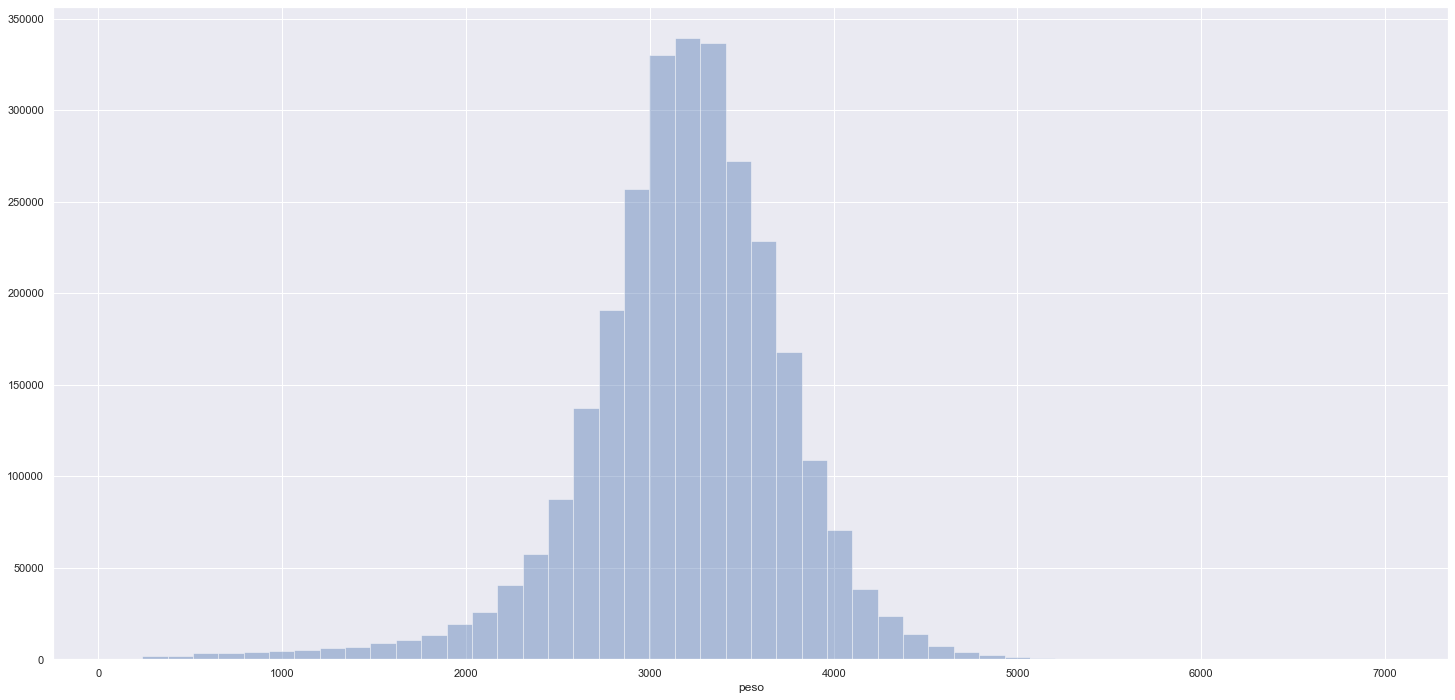

In [606]:
sns.distplot(df4['peso'], kde=False)

### 2.3.2 B) How many babies were born weighing less than 2000 grams? (If necessary, remove inconsistencies from the variable.)

In [615]:
aux = df4[(df4['peso'] > 700) & (df4['peso'] < 2000)]

In [617]:
aux.shape[0]

74950

### 2.3.3 C) What is the percentage of this value considering the size of the database?

In [618]:
percent = (len(aux) / len(df4))*100
percent

2.6470919602219247

## 2.4 Question 4

How many health facilities does the database contain in each FU?

In [619]:
df5 = df4.copy()

In [620]:
df5.head()

,dtnasc,codmunnasc,codmunres,dtnascmae,codestab,racacormae,locnasc,parto,peso,escmae2010,estcivmae,gestacao,semagestac,seriescmae,idadepai,tpapresent,sttrabpart,stcesparto,tpnascassi,consprenat,codestadnasc,estadonasc,anomaenasc,mesmaenasc,diamaenasc,date,day_calc_age,idademae
0,19022016,110001,110001,18121987,2679477.0,1.0,1,1.0,3100,2.0,2.0,5.0,39.0,8.0,24.0,2.0,2.0,3.0,1.0,9.0,11,Acre,1987,12,18,1987-12-18,2021-07-12,33
1,22022016,110001,110001,17011998,NaN,5.0,4,1.0,1800,1.0,5.0,5.0,37.0,3.0,20.0,1.0,2.0,3.0,1.0,5.0,11,Acre,1998,1,17,1998-01-17,2021-07-12,23
2,13022016,110001,110001,15021986,2679477.0,5.0,1,1.0,3545,1.0,5.0,5.0,39.0,NaN,38.0,1.0,2.0,3.0,1.0,7.0,11,Acre,1986,2,15,1986-02-15,2021-07-12,35
3,5022016,110001,110001,7041986,2679477.0,5.0,1,1.0,3550,1.0,9.0,5.0,39.0,3.0,NaN,1.0,2.0,3.0,1.0,6.0,11,Acre,1986,4,7,1986-07-04,2021-07-12,35
4,25022016,110001,110001,18121989,2679477.0,1.0,1,1.0,2565,3.0,5.0,5.0,38.0,NaN,34.0,1.0,2.0,3.0,1.0,7.0,11,Acre,1989,12,18,1989-12-18,2021-07-12,31


In [621]:
df5['codestab'].unique()

array([2679477.,      nan, 2516500., ..., 7078730.,   10677., 3333333.])

In [622]:
df5 = df5[df5['codestab'].notna()]

In [628]:
df5['codestab'] = df5['codestab'].astype('int64')

In [631]:
aux = df5[df5['estadonasc'] == 'Acre']

In [643]:
df = df5.groupby('estadonasc')['codestab'].nunique()

In [645]:
df.sort_values(ascending= False)

estadonasc
São Paulo              744
Espírito Santo         521
Rio Grande do Norte    503
Mato Grosso            390
Santa Catarina         307
Rondonia               301
Goiás                  277
Alagoas                270
Pernambuco             262
Minas Gerais           236
Ceará                  223
Mato Grosso do Sul     178
Paraná                 162
Bahia                  128
Distrito Federal       116
Maranhão               110
Amazona                103
Rio de Janeiro          89
Paraíba                 88
Acre                    75
Tocantins               73
Piauí                   61
Sergipe                 45
Rio Grande do Sul       31
Roraima                 24
Amapá                   24
Pará                    19
Name: codestab, dtype: int64

## 2.5 Question 5

In [646]:
df6 = df5.copy()

5. In relation to UF of birth:
    
a) How many children were born in a hospital or at home in Bahia?

b) Show the distribution of births per month in Bahia


### 2.5.1 A) How many children were born in a hospital or at home in Bahia?

In [660]:
aux1 = df6[df6['estadonasc'] == 'Bahia']

In [661]:
len(aux1)

49092

In [662]:
aux2 = aux1[(aux1['locnasc'] == 1) | (aux1['locnasc'] == 3)]

In [664]:
print(len(aux2))

47861


### 2.5.2 B) Show the distribution of births per month in Bahia

In [665]:
aux1['mesnasc'] = aux1['dtnascmae'].astype(str).str[2:-4].astype(int)

In [670]:
aux1['mesnasc'].unique()

array([ 3, 11, 12,  8,  1,  0,  6,  5,  2,  9,  7,  4, 10])

In [672]:
aux1['mesnasc'] = aux1['mesnasc'].replace([0], [10])

<AxesSubplot: xlabel='mesnasc', ylabel='count'>

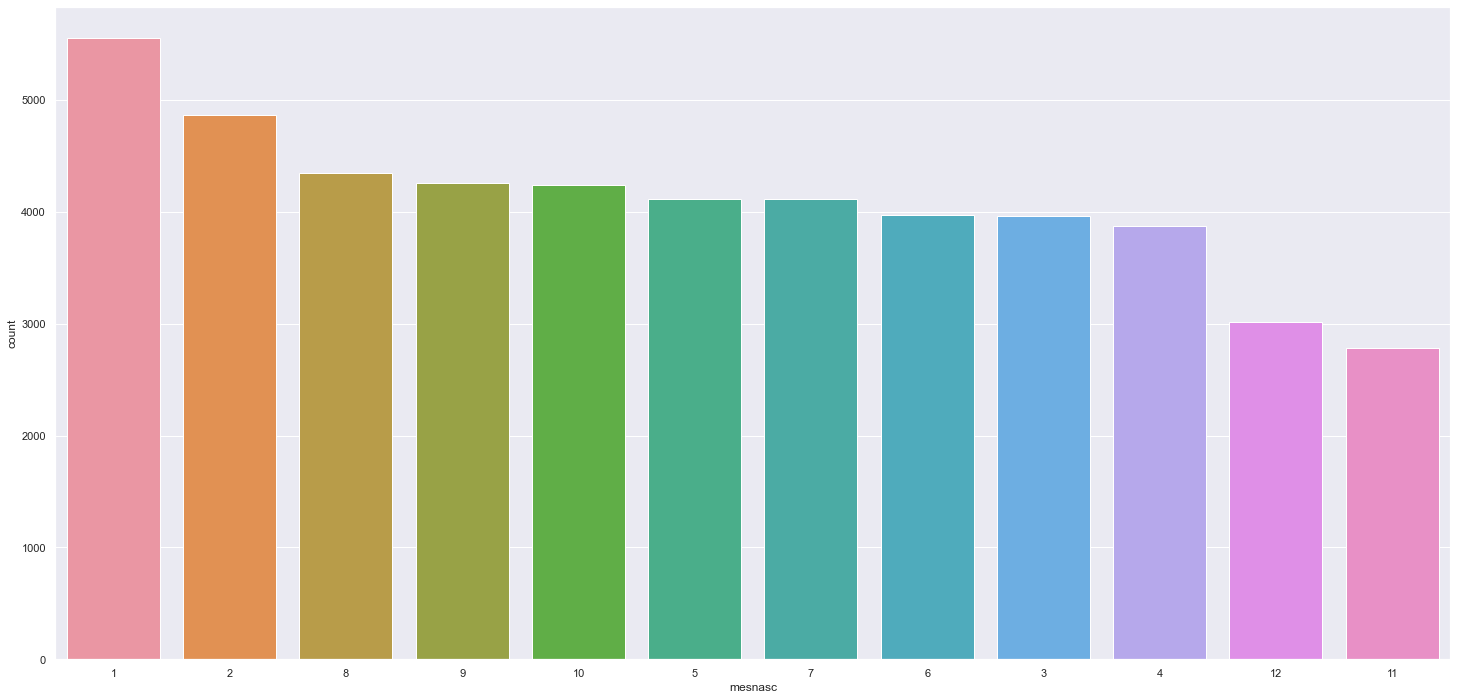

In [674]:
sns.countplot(x='mesnasc', data=aux1, order = aux1['mesnasc'].value_counts().index)

## 2.6 Question 6

In [676]:
df7 = df6.copy()

In relation to the mothers of the Born:
    
a) Show the distribution of schooling of single, black and brown mothers for each UF.

b) What percentage of married women have had a vaginal birth at less than 37 weeks' gestation? And in relation to women who had
Cesarean delivery, what percentage??


### 2.6.1 A) Show the distribution of schooling of single, black and brown mothers for each UF.

#### Acre

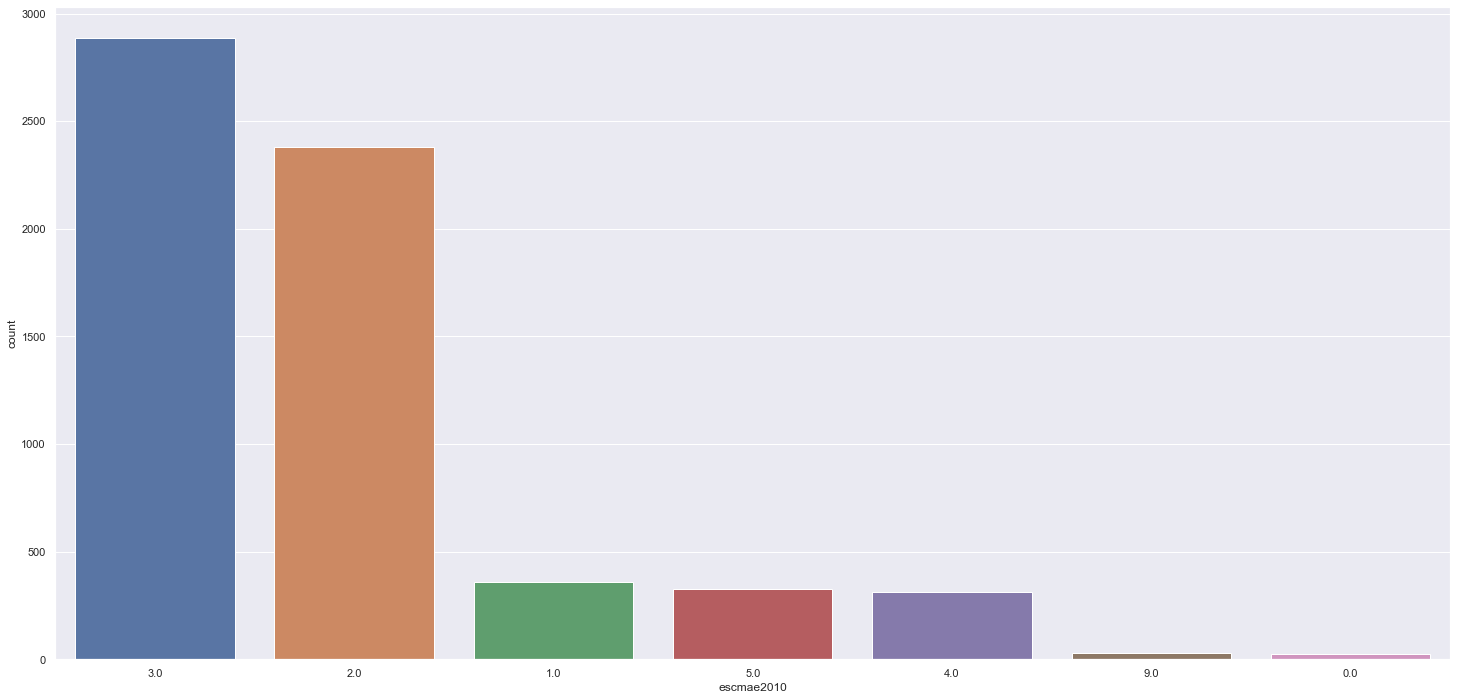

In [716]:
aux = df7[(df7['estadonasc'] == 'Acre') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Alagoas

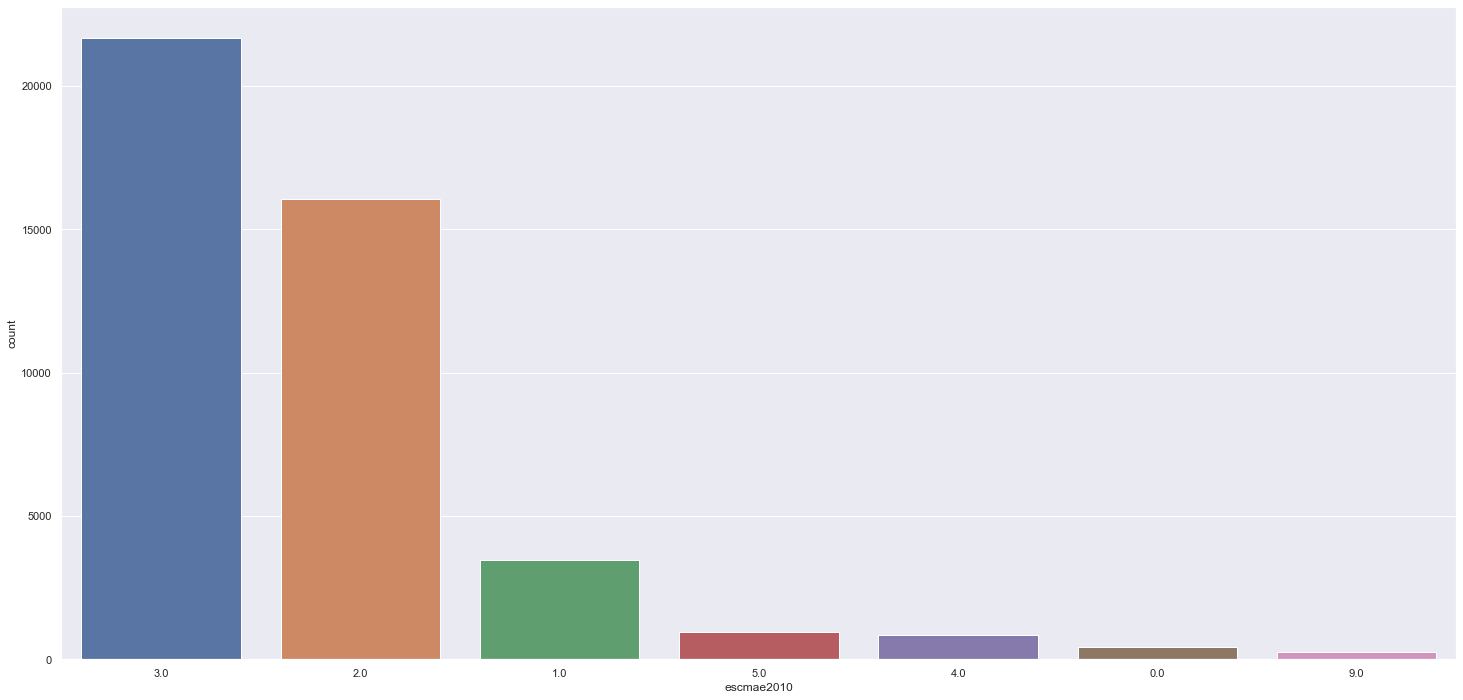

In [717]:
aux = df7[(df7['estadonasc'] == 'Alagoas') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Amapá

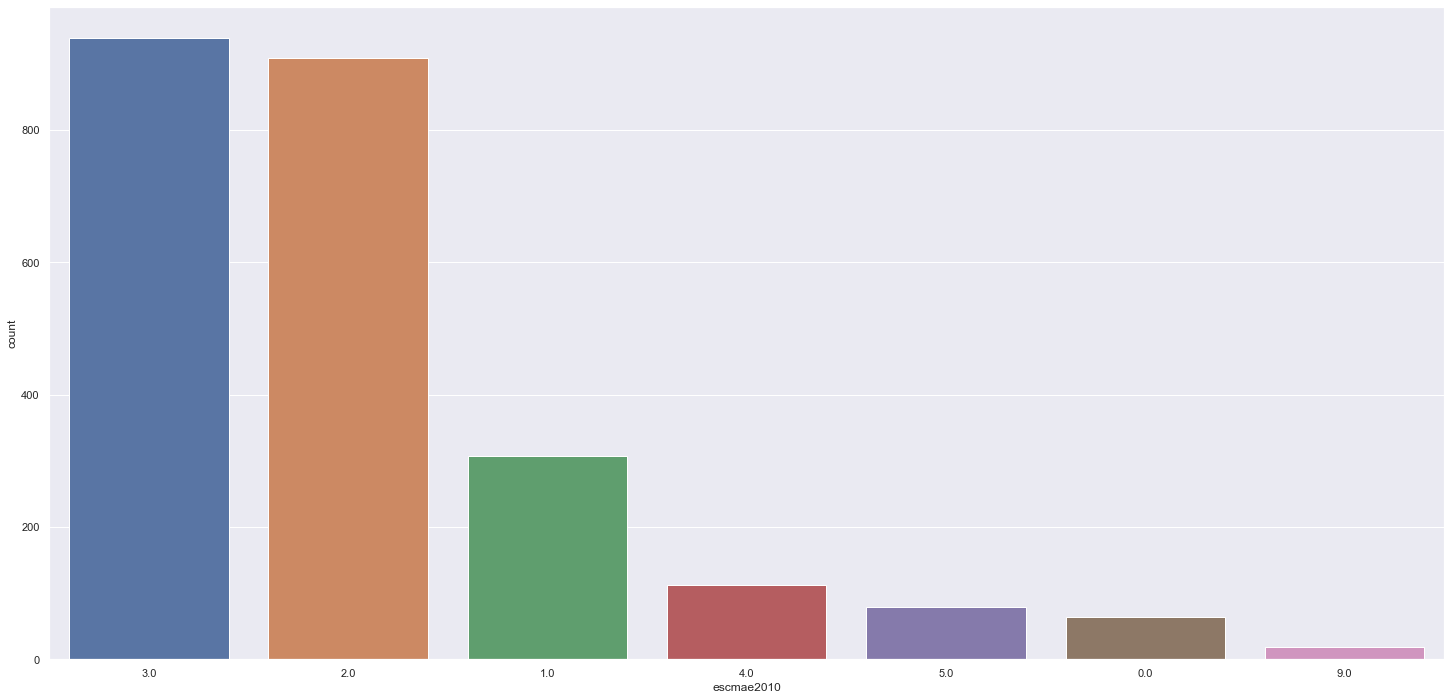

In [718]:
aux = df7[(df7['estadonasc'] == 'Amapá') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Amazonas

In [691]:
aux = df7[(df7['estadonasc'] == 'Amazonas') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

ValueError: min() arg is an empty sequence

#### Bahia

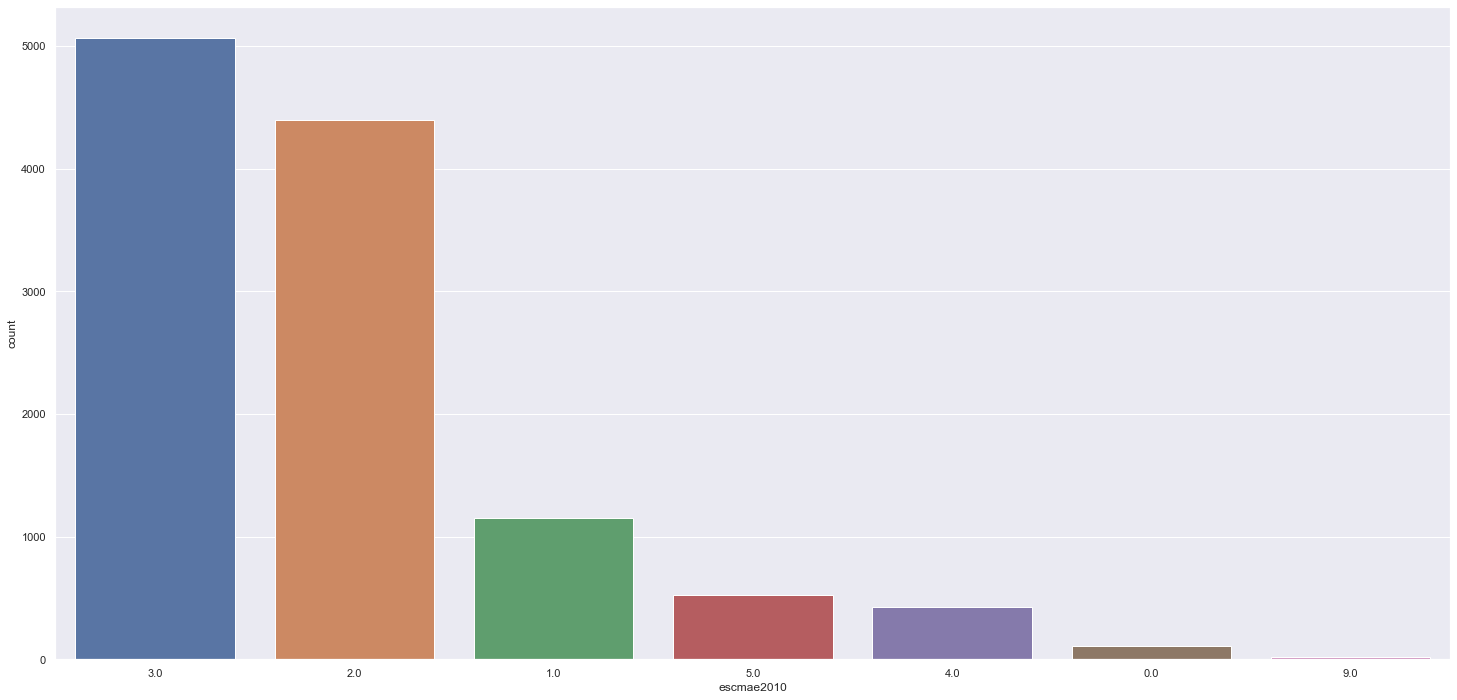

In [719]:
aux = df7[(df7['estadonasc'] == 'Bahia') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Ceará

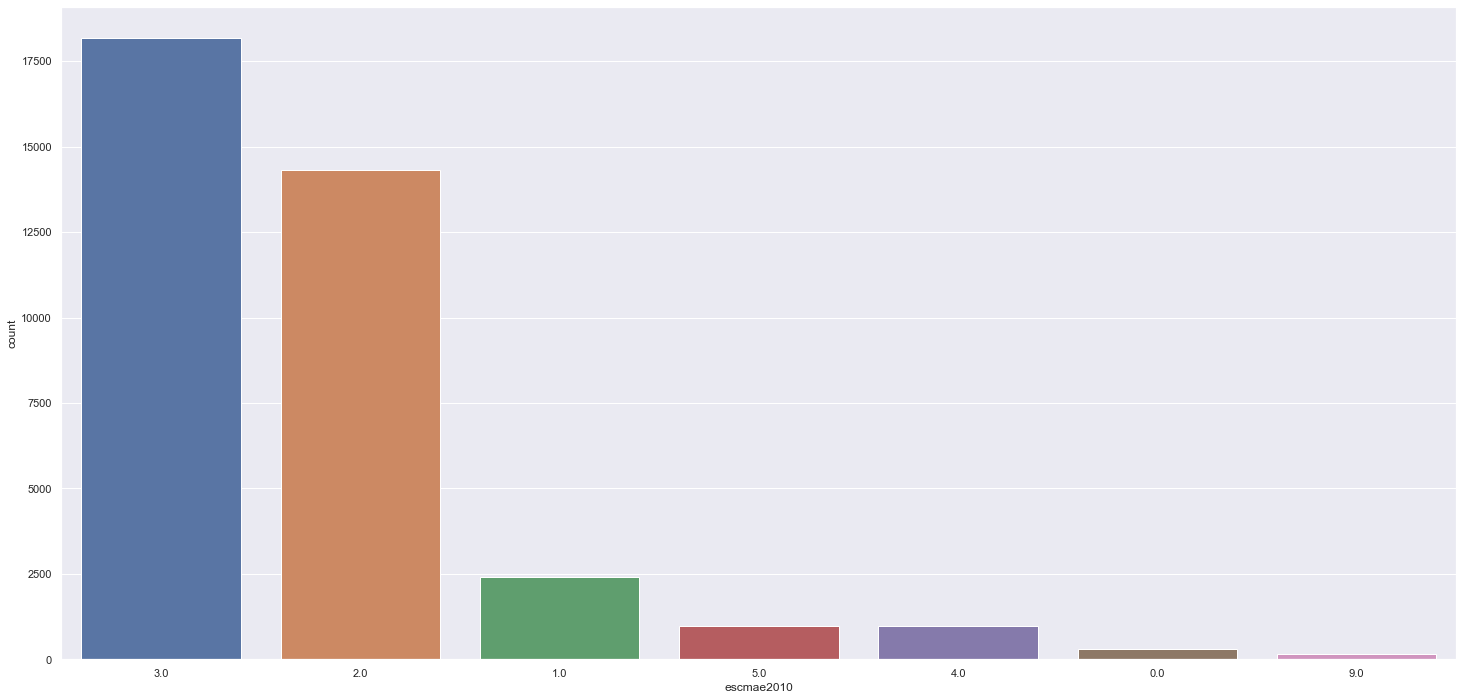

In [720]:
aux = df7[(df7['estadonasc'] == 'Ceará') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Distrito Federal

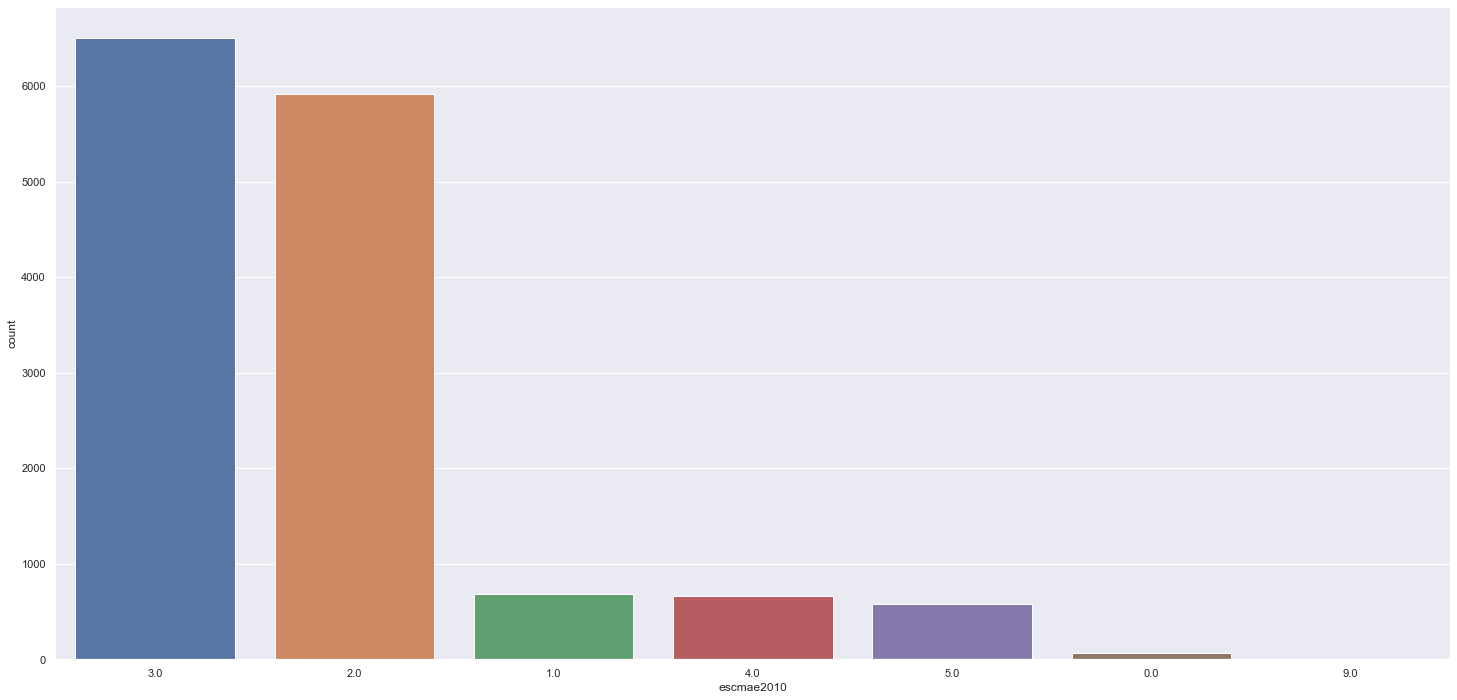

In [721]:
aux = df7[(df7['estadonasc'] == 'Distrito Federal') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Espirito Santo

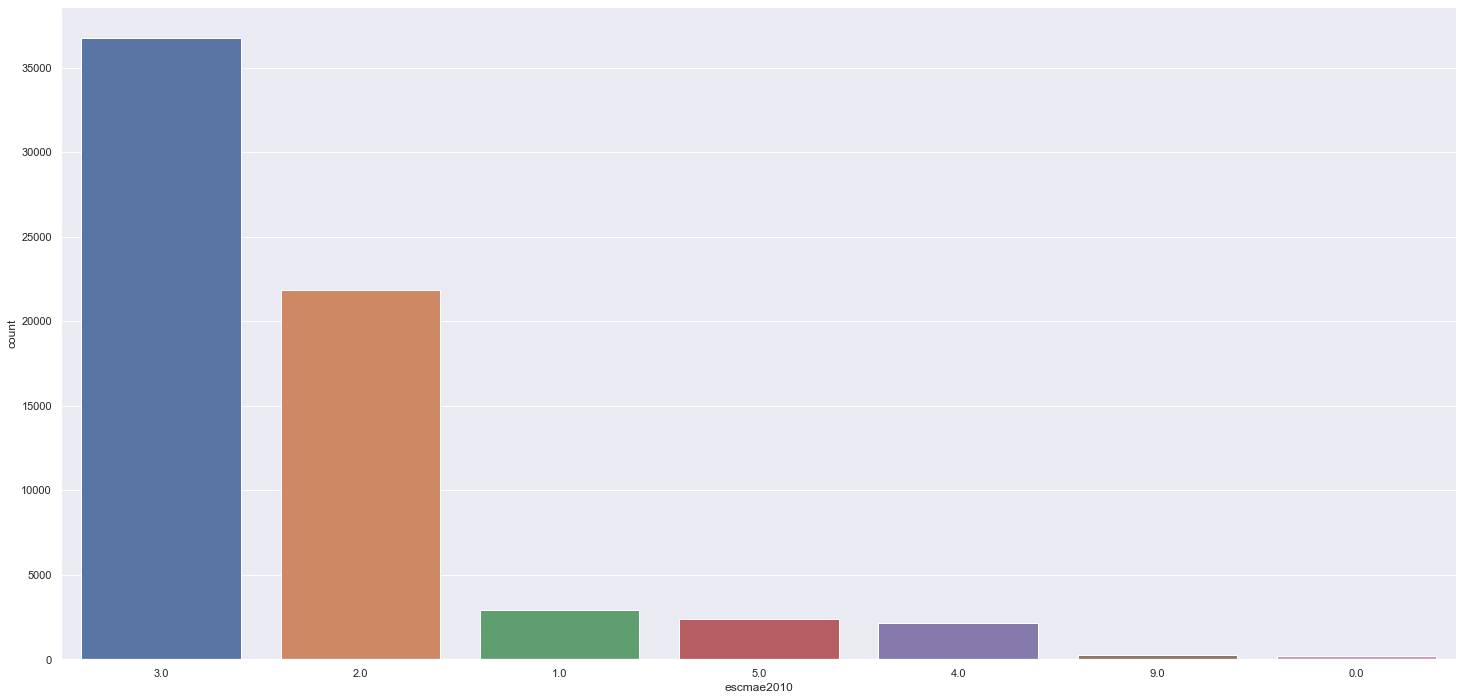

In [722]:
aux = df7[(df7['estadonasc'] == 'Espírito Santo') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Goiás

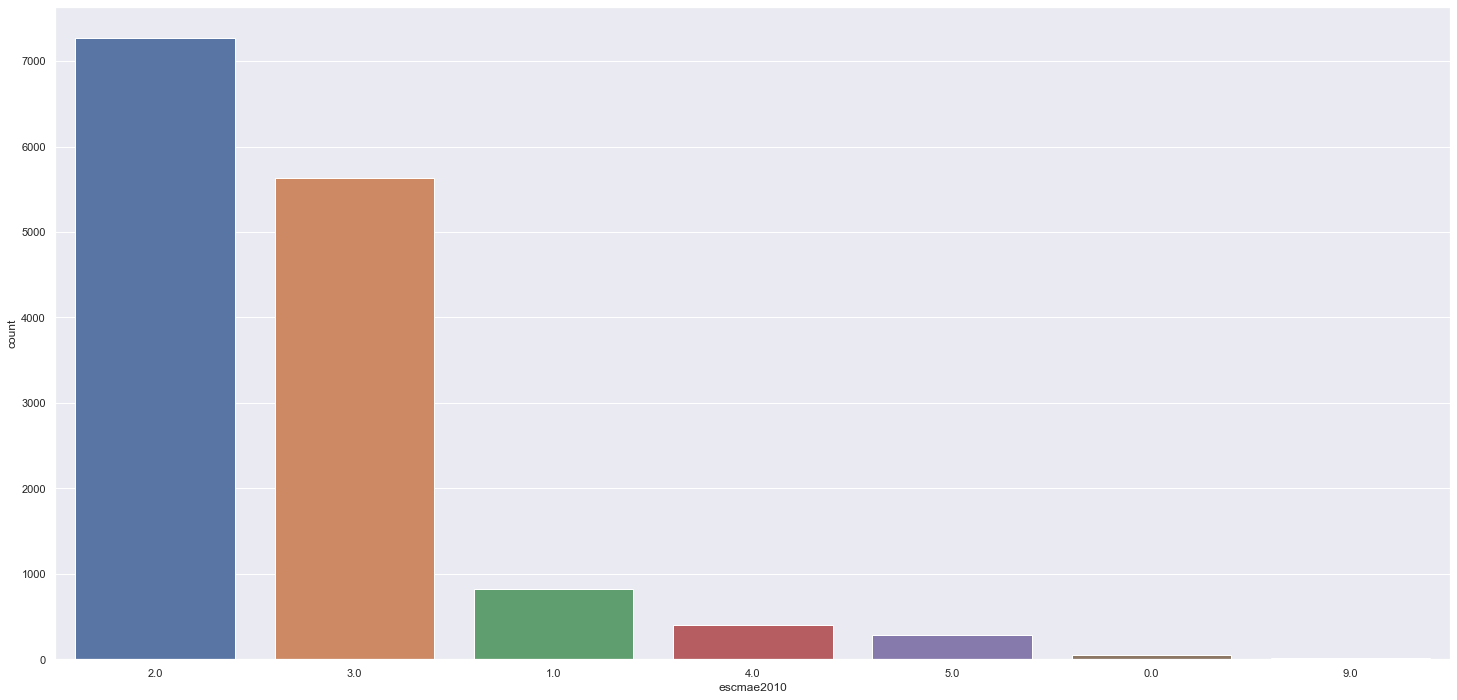

In [723]:
aux = df7[(df7['estadonasc'] == 'Goiás') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Maranhão

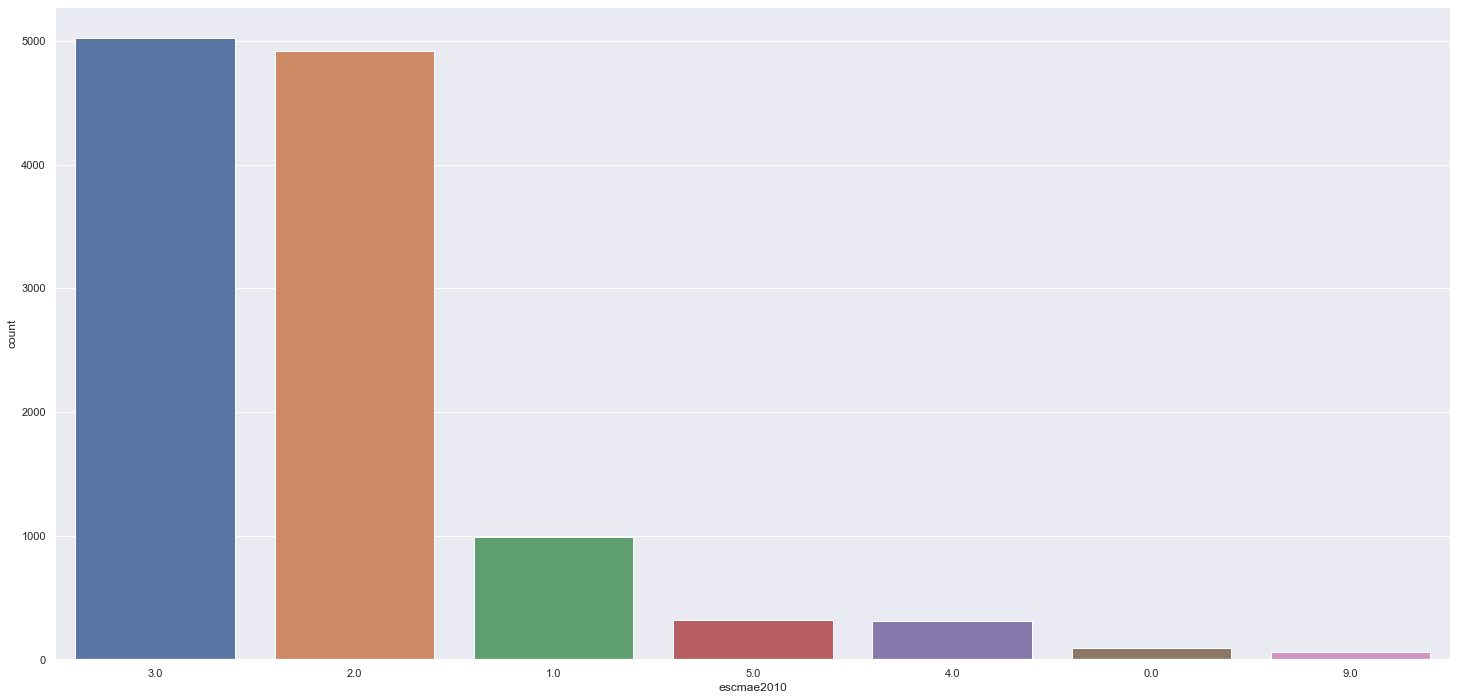

In [724]:
aux = df7[(df7['estadonasc'] == 'Maranhão') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Mato Grosso

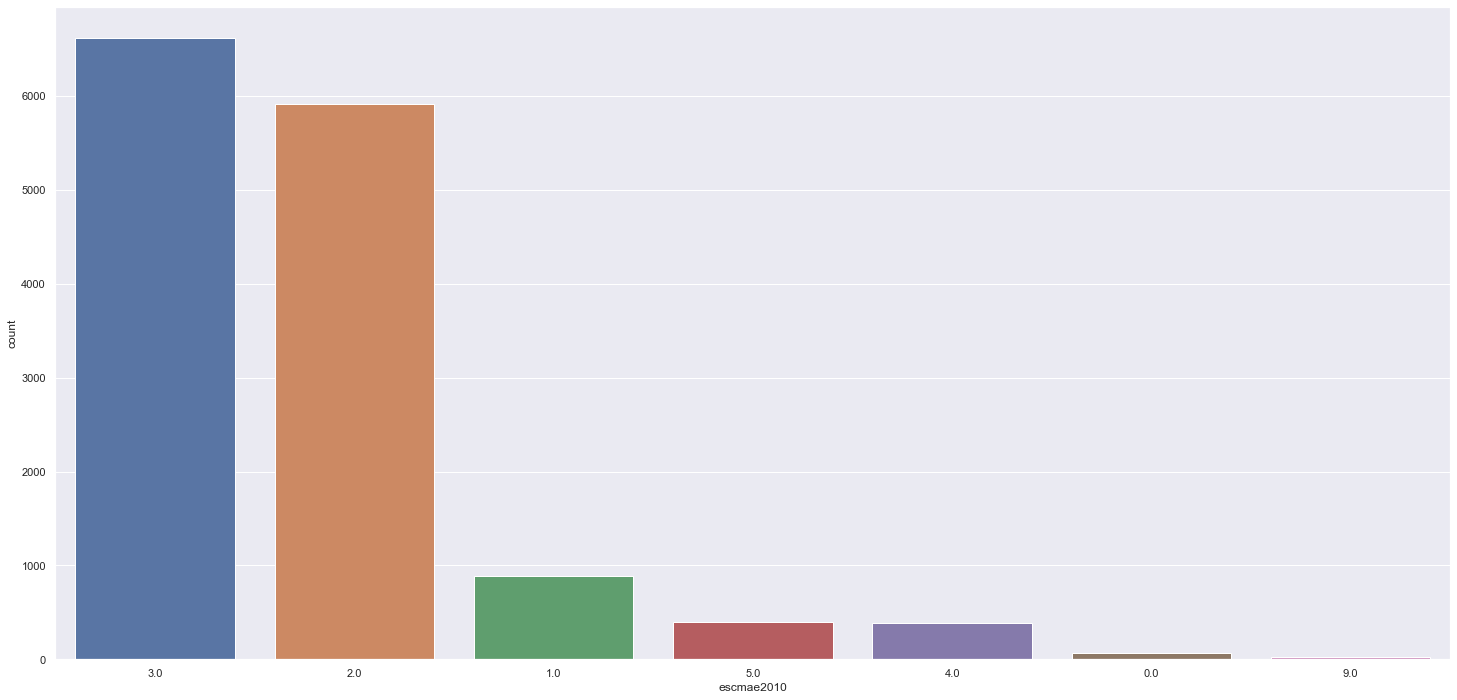

In [725]:
aux = df7[(df7['estadonasc'] == 'Mato Grosso') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Mato Grosso do Sul

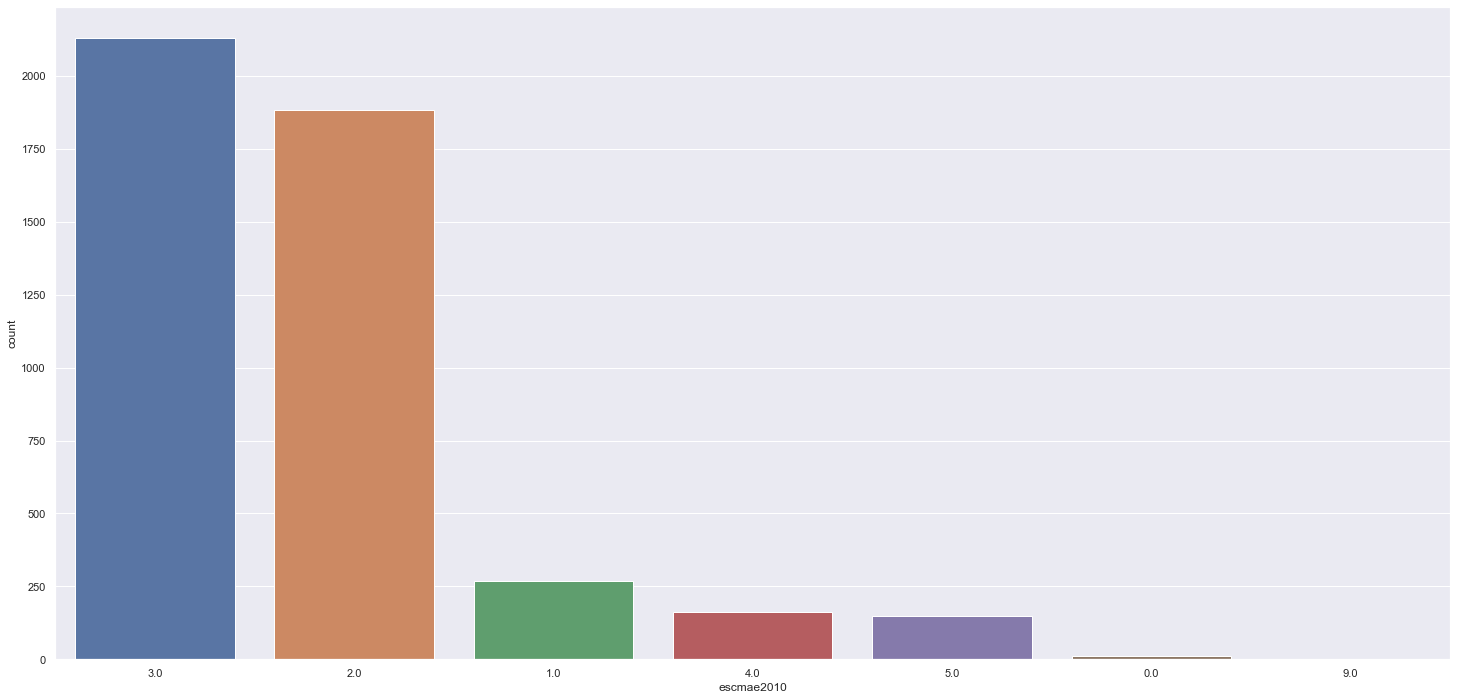

In [726]:
aux = df7[(df7['estadonasc'] == 'Mato Grosso do Sul') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Pará

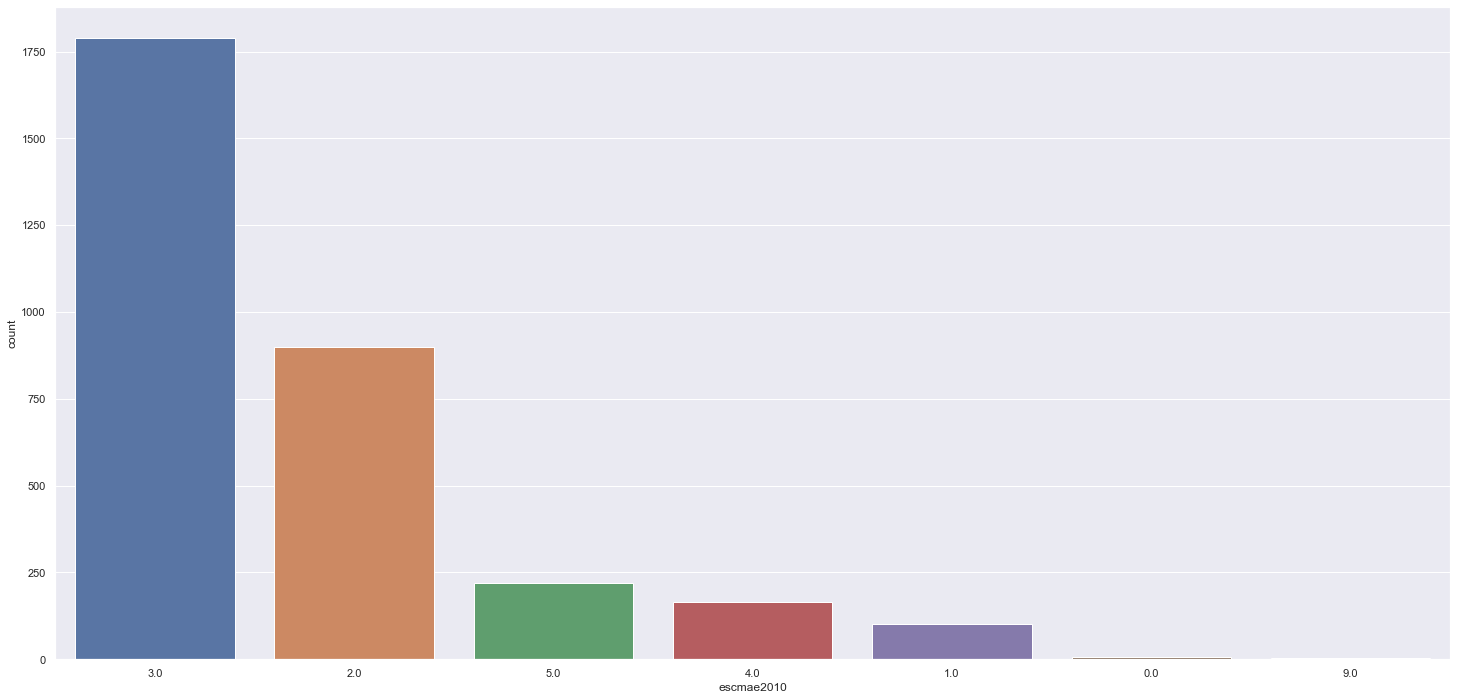

In [727]:
aux = df7[(df7['estadonasc'] == 'Pará') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Paraíba

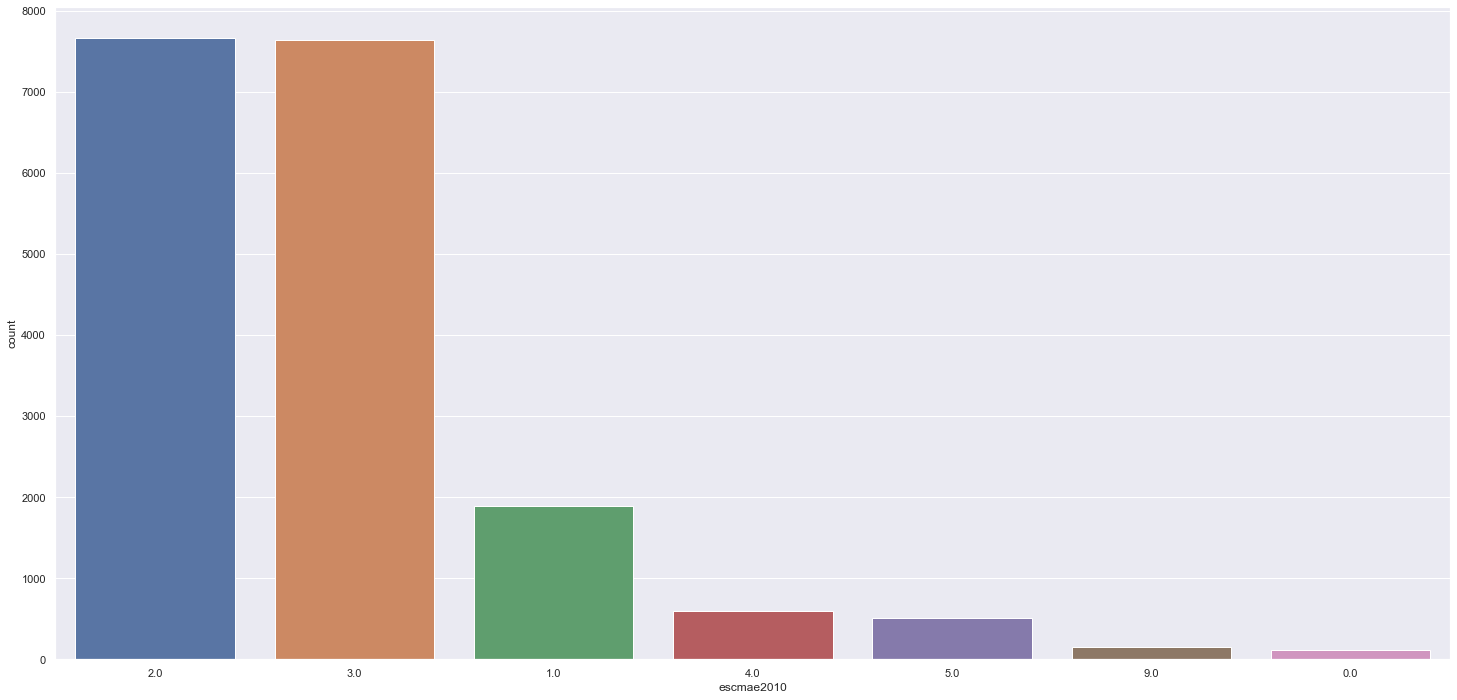

In [728]:
aux = df7[(df7['estadonasc'] == 'Paraíba') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Paraná

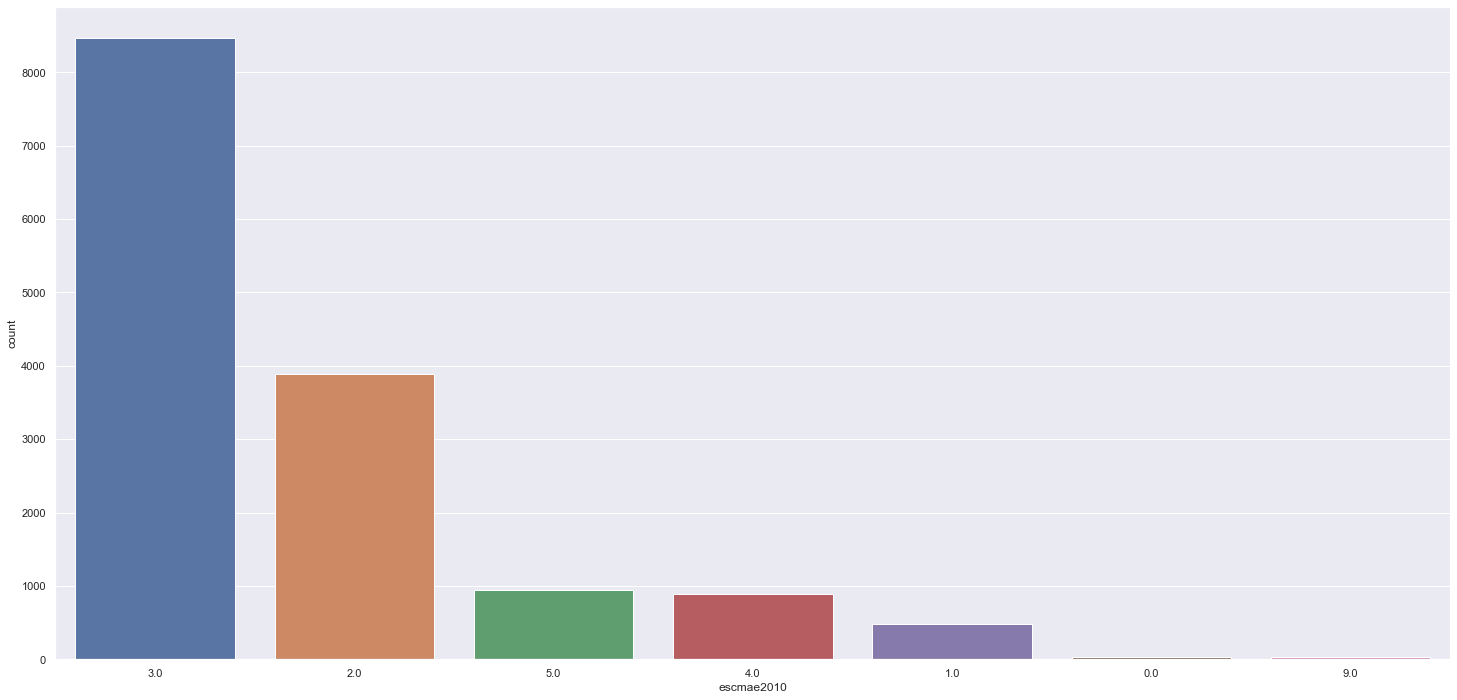

In [729]:
aux = df7[(df7['estadonasc'] == 'Paraná') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Pernambuco

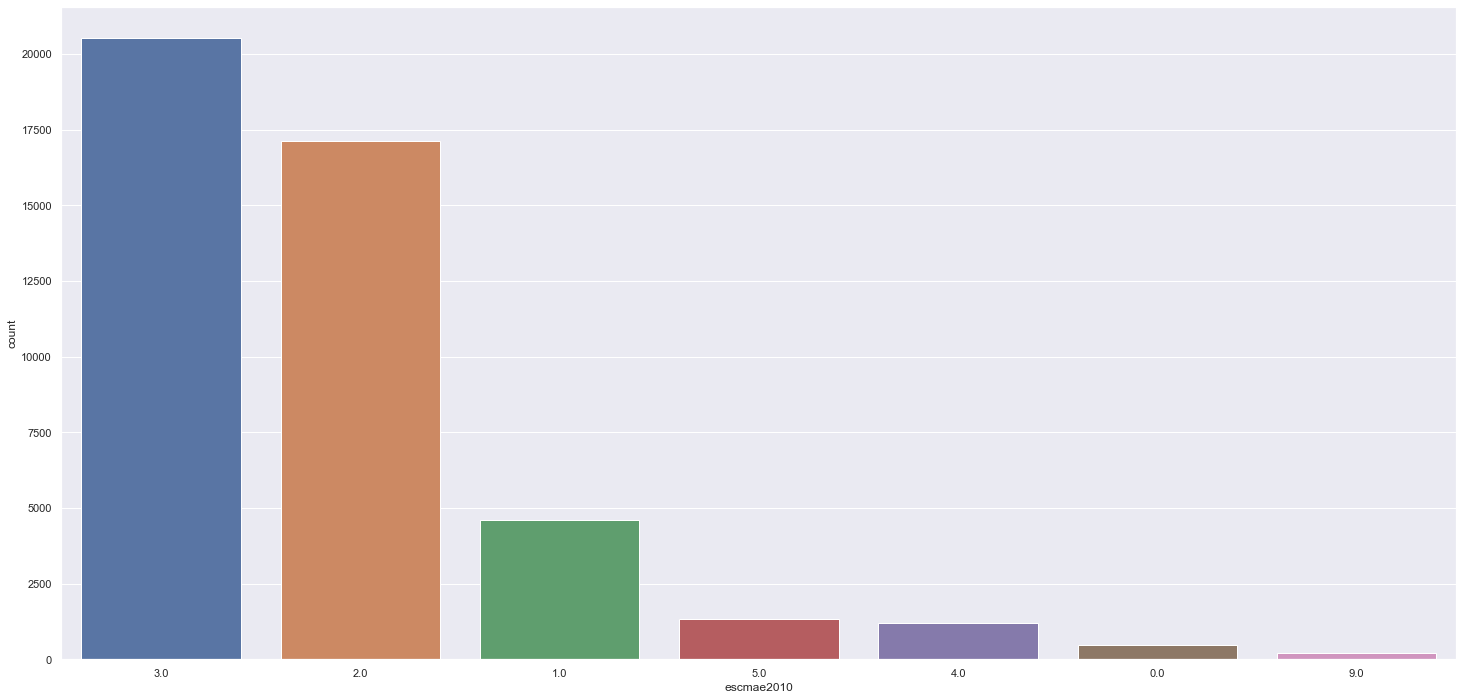

In [730]:
aux = df7[(df7['estadonasc'] == 'Pernambuco') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Rio de Janeiro

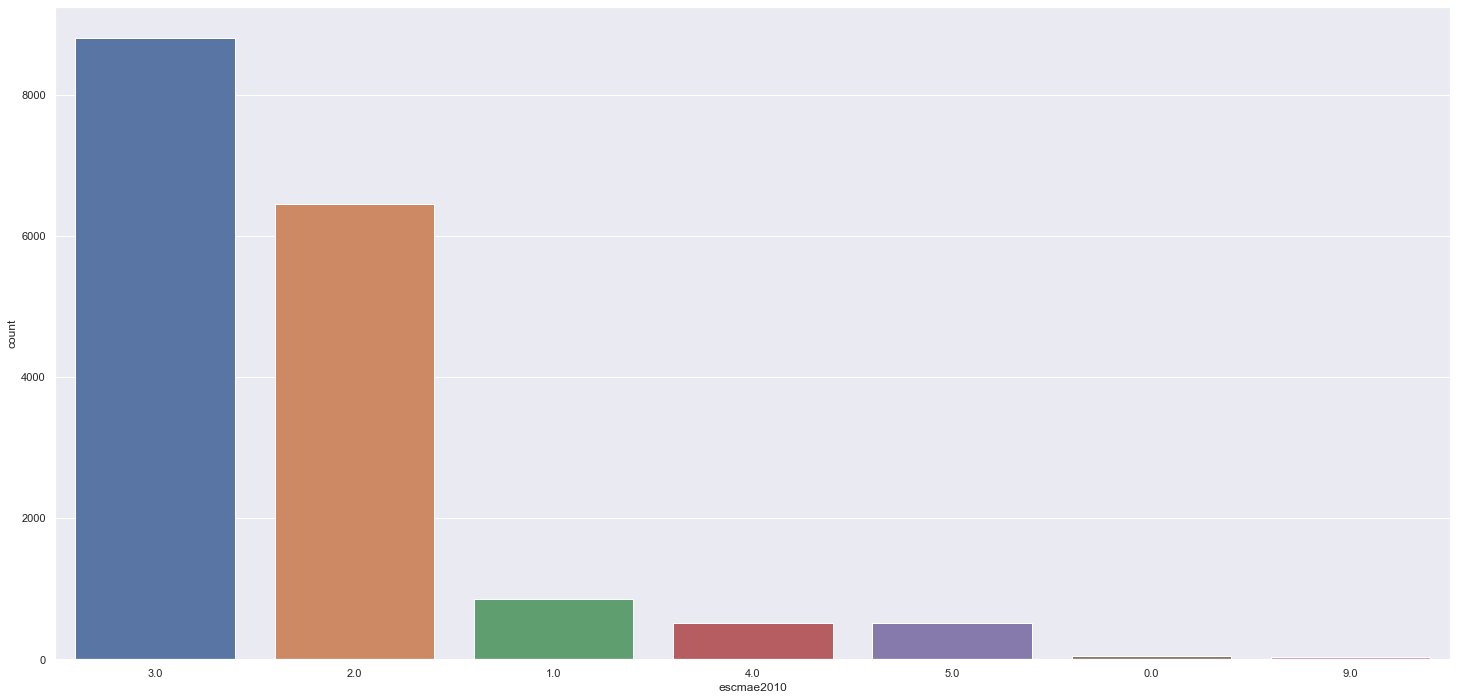

In [731]:
aux = df7[(df7['estadonasc'] == 'Rio de Janeiro') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Rio Grande do Norte

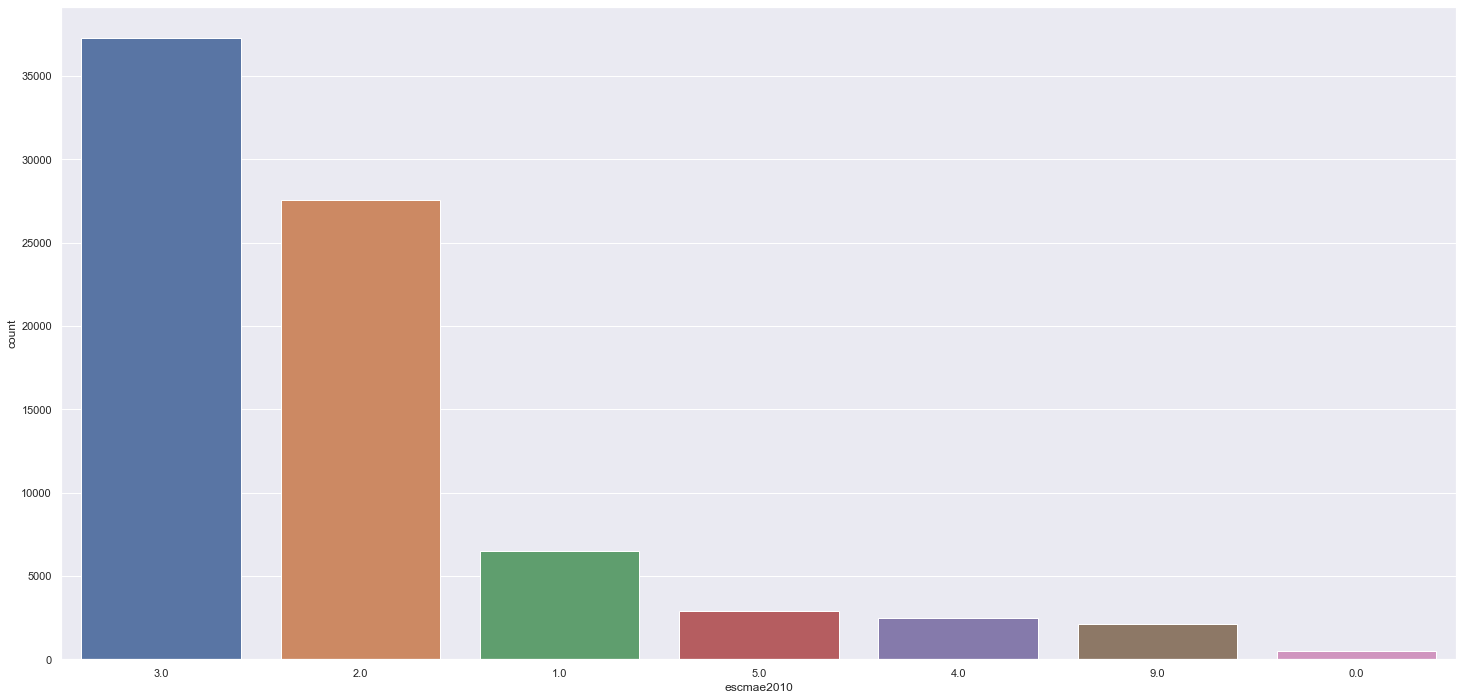

In [732]:
aux = df7[(df7['estadonasc'] == 'Rio Grande do Norte') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Rio Grande do Sul

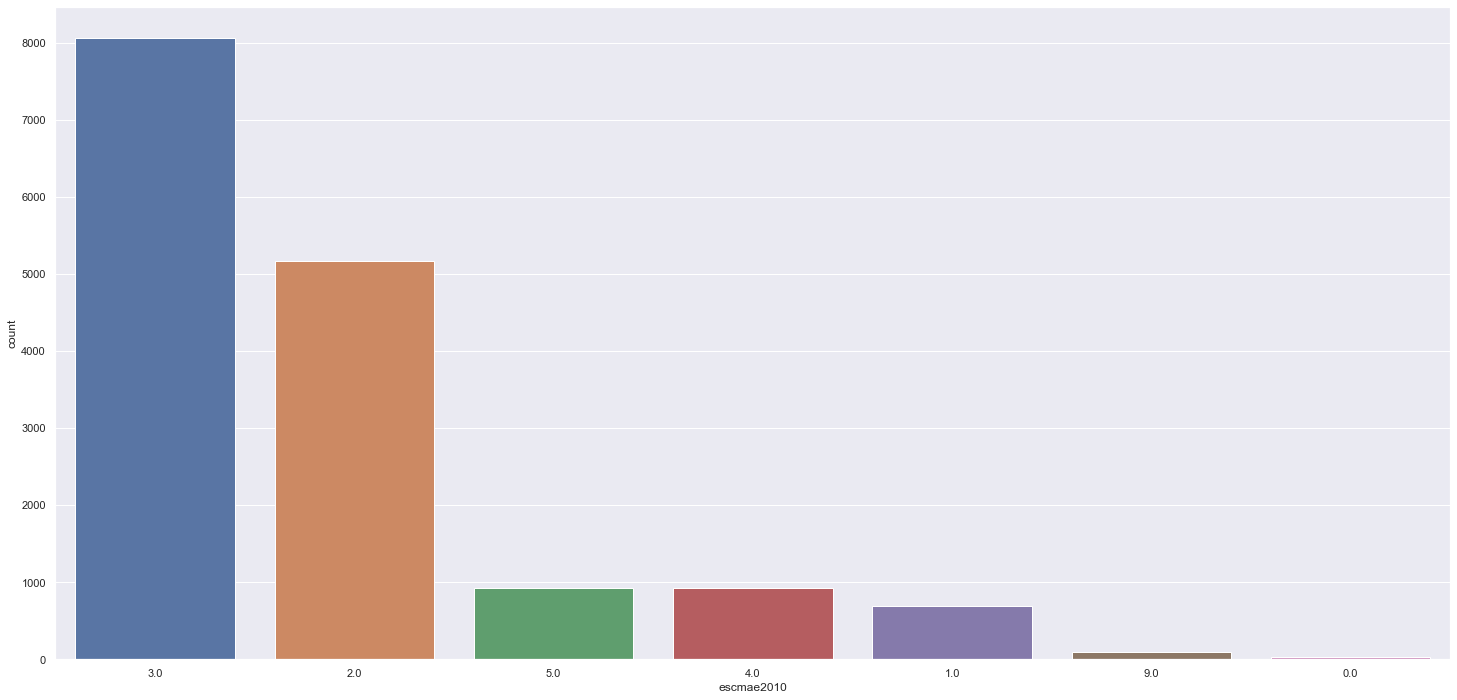

In [733]:
aux = df7[(df7['estadonasc'] == 'Rio Grande do Sul') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Rondonia

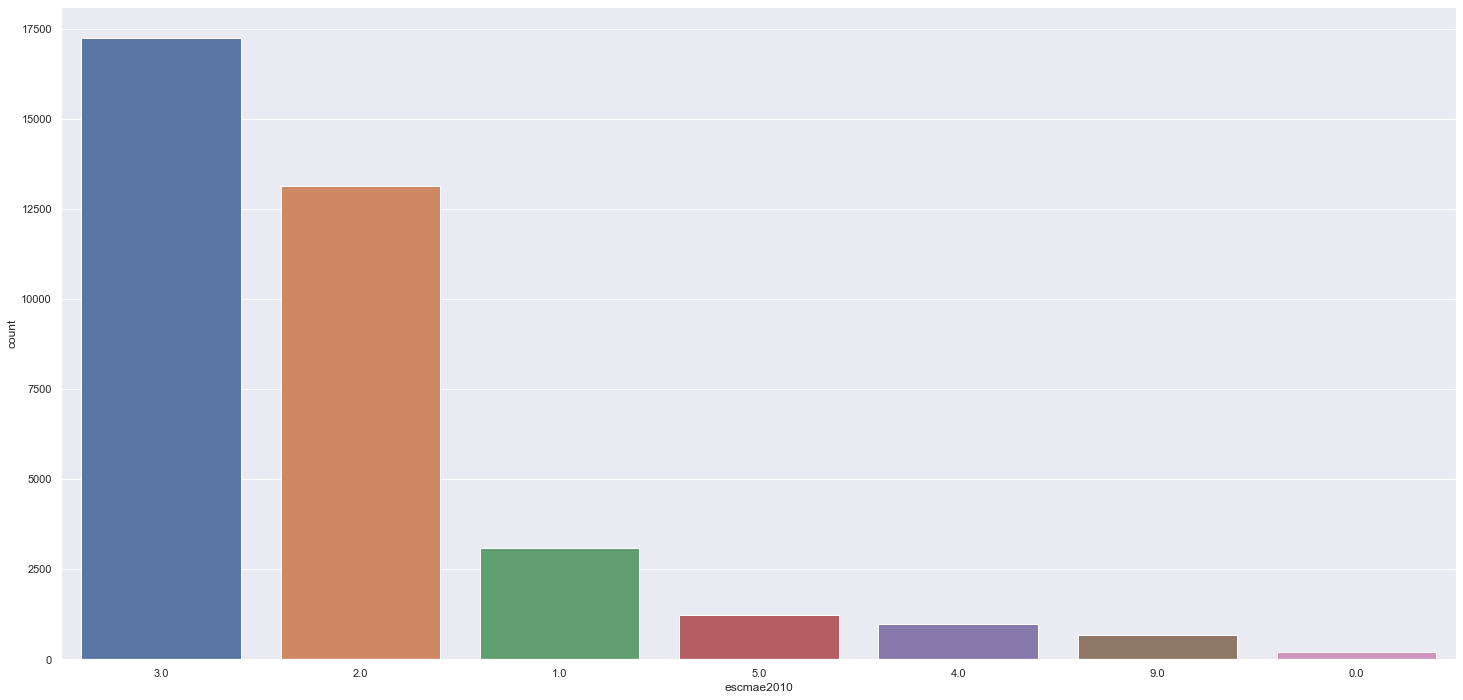

In [734]:
aux = df7[(df7['estadonasc'] == 'Rondonia') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Roraima

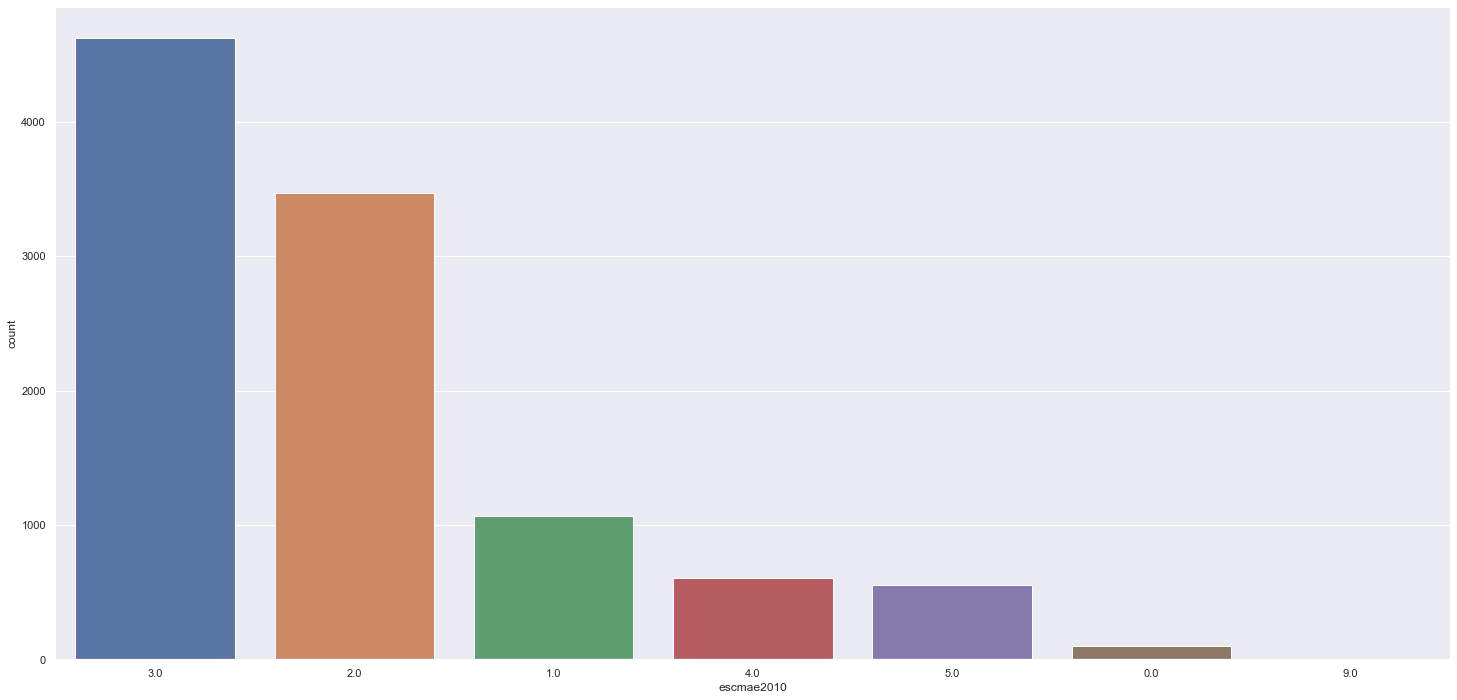

In [735]:
aux = df7[(df7['estadonasc'] == 'Roraima') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Santa Catarina

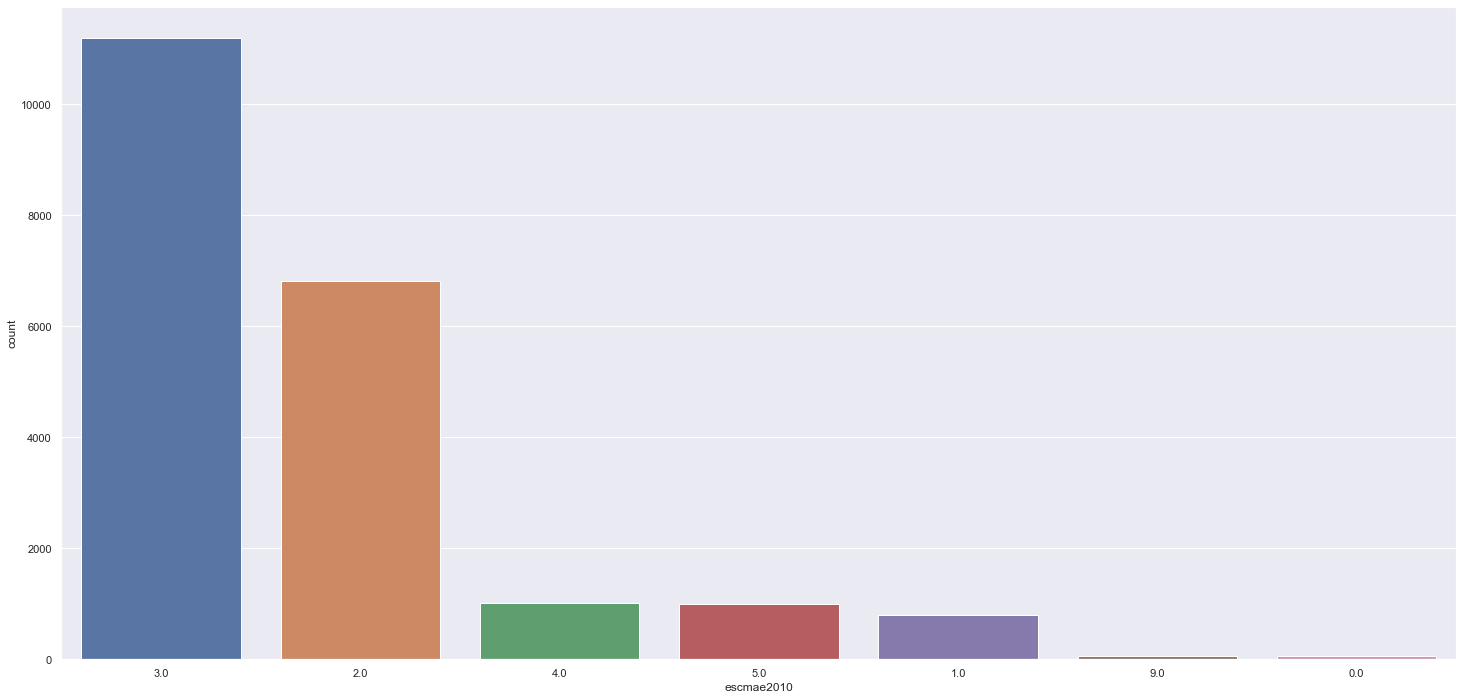

In [736]:
aux = df7[(df7['estadonasc'] == 'Santa Catarina') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### São Paulo

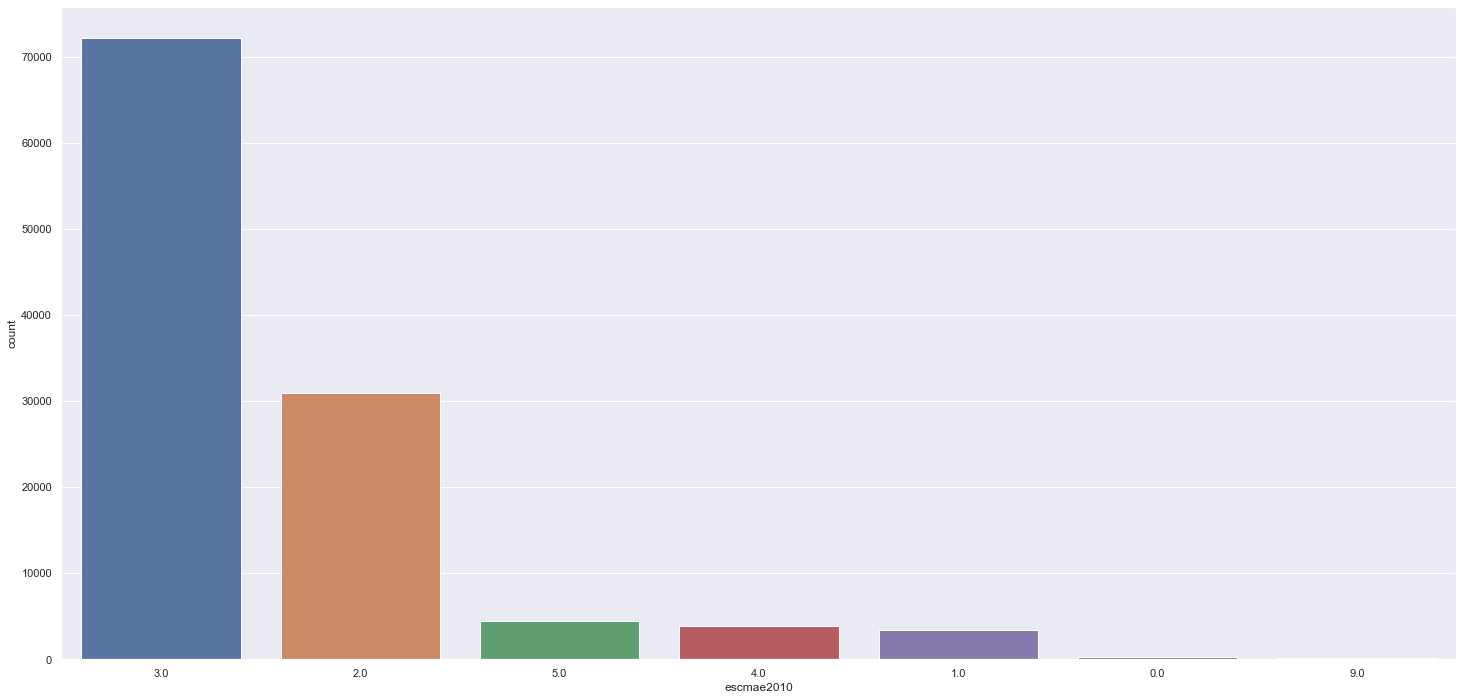

In [737]:
aux = df7[(df7['estadonasc'] == 'São Paulo') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Sergipe

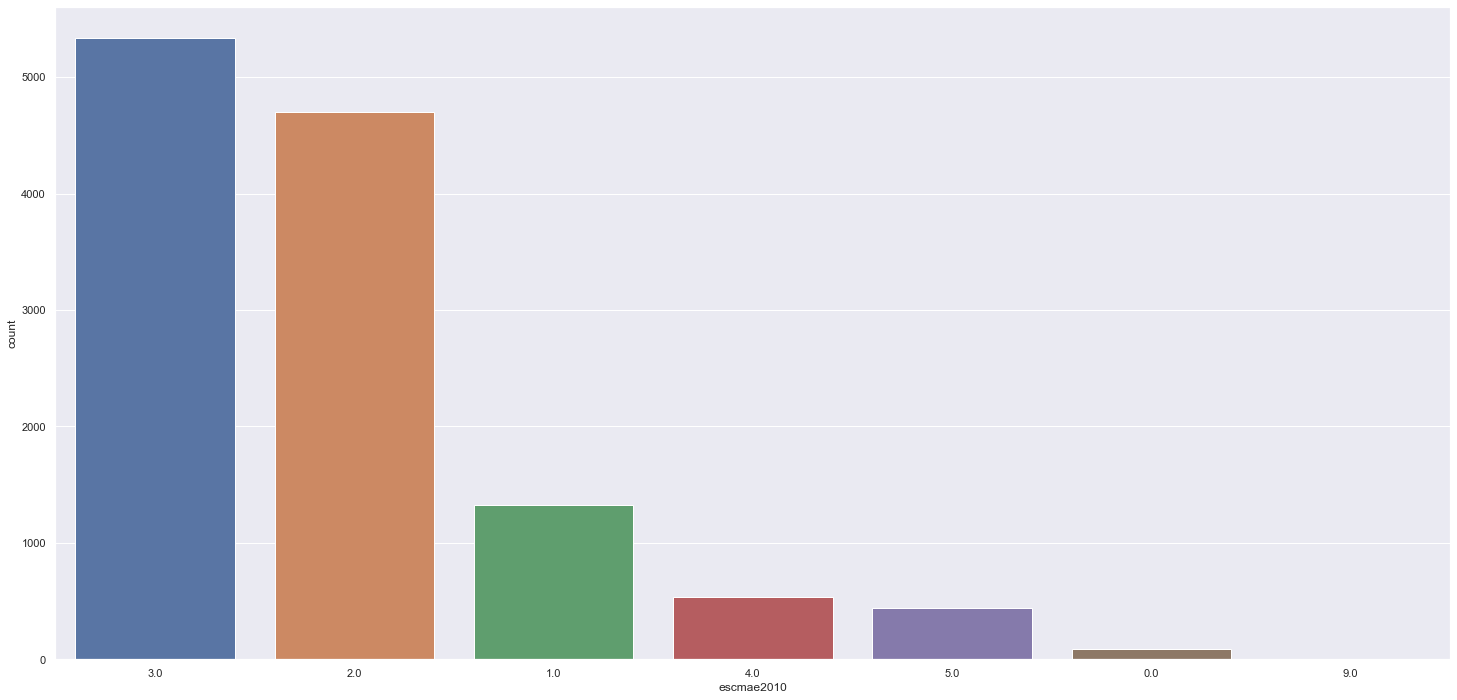

In [738]:
aux = df7[(df7['estadonasc'] == 'Sergipe') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

#### Tocantins

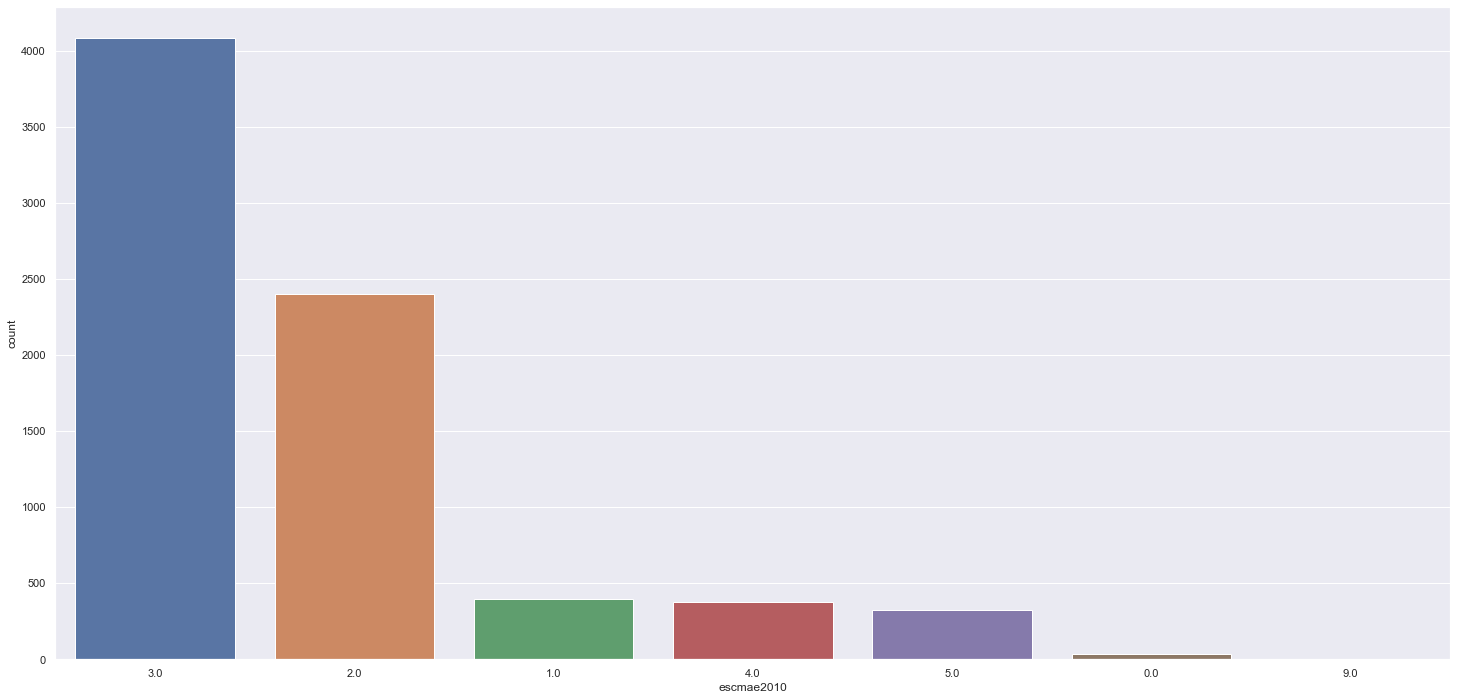

In [739]:
aux = df7[(df7['estadonasc'] == 'Tocantins') & (df7['estcivmae'] == 1)]

aux1 = aux[(aux['racacormae'] == 2) | (aux['racacormae'] == 4)]

sns.countplot(x='escmae2010', data=aux1, order = aux1['escmae2010'].value_counts().index);

### 2.6.2 B) What percentage of married women have had a vaginal birth at less than 37 weeks' gestation? And in relation to women who had Cesarean delivery, what percentage??

In [800]:
aux = df7[(df7['estcivmae'] == 2.0) & df7['parto'] == 1.0 ]

In [801]:
aux.head()

,dtnasc,codmunnasc,codmunres,dtnascmae,codestab,racacormae,locnasc,parto,peso,escmae2010,estcivmae,gestacao,semagestac,seriescmae,idadepai,tpapresent,sttrabpart,stcesparto,tpnascassi,consprenat,codestadnasc,estadonasc,anomaenasc,mesmaenasc,diamaenasc,date,day_calc_age,idademae
0,19022016,110001,110001,18121987,2679477,1.0,1,1.0,3100,2.0,2.0,5.0,39.0,8.0,24.0,2.0,2.0,3.0,1.0,9.0,11,Acre,1987,12,18,1987-12-18,2021-07-12,33
6,14022016,110001,110001,28081993,2679477,1.0,1,1.0,3930,3.0,2.0,5.0,40.0,3.0,25.0,1.0,2.0,3.0,1.0,9.0,11,Acre,1993,8,28,1993-08-28,2021-07-12,27
9,25012016,110001,110001,7021991,2516500,1.0,1,2.0,3600,3.0,2.0,5.0,38.0,NaN,29.0,1.0,2.0,2.0,1.0,7.0,11,Acre,1991,2,7,1991-07-02,2021-07-12,30
10,12012016,110001,110001,23071995,2679477,4.0,1,1.0,3300,3.0,2.0,5.0,37.0,3.0,24.0,1.0,2.0,3.0,1.0,3.0,11,Acre,1995,7,23,1995-07-23,2021-07-12,25
11,14012016,110001,110001,25041989,2516500,1.0,1,2.0,3800,3.0,2.0,NaN,NaN,3.0,30.0,1.0,2.0,1.0,1.0,8.0,11,Acre,1989,4,25,1989-04-25,2021-07-12,32


In [802]:
aux1 = aux[aux['gestacao'] < 5.0]

In [803]:
print((len(aux1)/len(df7))*100)

3.456761445195916


In [804]:
aux = df7[(df7['estcivmae'] == 2) & (df7['parto'] == 2.0 )]

In [805]:
aux.head()

,dtnasc,codmunnasc,codmunres,dtnascmae,codestab,racacormae,locnasc,parto,peso,escmae2010,estcivmae,gestacao,semagestac,seriescmae,idadepai,tpapresent,sttrabpart,stcesparto,tpnascassi,consprenat,codestadnasc,estadonasc,anomaenasc,mesmaenasc,diamaenasc,date,day_calc_age,idademae
9,25012016,110001,110001,7021991,2516500,1.0,1,2.0,3600,3.0,2.0,5.0,38.0,NaN,29.0,1.0,2.0,2.0,1.0,7.0,11,Acre,1991,2,7,1991-07-02,2021-07-12,30
11,14012016,110001,110001,25041989,2516500,1.0,1,2.0,3800,3.0,2.0,NaN,NaN,3.0,30.0,1.0,2.0,1.0,1.0,8.0,11,Acre,1989,4,25,1989-04-25,2021-07-12,32
13,6012016,110001,110001,8121994,2679477,4.0,1,2.0,3925,2.0,2.0,5.0,41.0,NaN,NaN,1.0,2.0,2.0,1.0,4.0,11,Acre,1994,2,8,1994-08-02,2021-07-12,26
19,22032016,110001,110001,7081989,2679477,4.0,1,2.0,3940,3.0,2.0,5.0,39.0,NaN,27.0,1.0,2.0,2.0,1.0,8.0,11,Acre,1989,8,7,1989-07-08,2021-07-12,32
35,18042016,110001,110001,9111993,2516500,1.0,1,2.0,3150,2.0,2.0,5.0,37.0,NaN,26.0,1.0,2.0,2.0,1.0,6.0,11,Acre,1993,1,9,1993-09-01,2021-07-12,27


In [806]:
aux1 = aux[aux['gestacao'] < 5.0]

In [807]:
print((len(aux1)/len(df7))*100)

2.4684078496816113
